<a href="https://colab.research.google.com/github/jennahc/rent-or-buy/blob/main/RentOrBuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connecting to the Database

# Java Script - Possible Addition - DON'T NEED TO RUN

In [ ]:
!apt install nodejs


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libc-ares2 libnode64 nodejs-doc
Suggested packages:
  npm
The following NEW packages will be installed:
  libc-ares2 libnode64 nodejs nodejs-doc
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 6,805 kB of archives.
After this operation, 30.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-ares2 amd64 1.15.0-1ubuntu0.2 [36.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libnode64 amd64 10.19.0~dfsg-3ubuntu1 [5,765 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 nodejs-doc all 10.19.0~dfsg-3ubuntu1 [942 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 nodejs amd64 10.19.0~dfsg-3ubuntu1 [61.1 kB]
Fetched 6,805 kB in 1s (5,610 kB/s)
Selecting previously unselected package libc-ares2:amd64.
(Reading datab

In [ ]:
%%javascript
console.log("%cHello, world!", "font-size: 50px; color: blue; text-shadow: 3px 3px 0px white, 5px 5px 0px #00bfff;");


<IPython.core.display.Javascript object>

In [ ]:
%%javascript

// Define a function that adds two numbers
function add(a, b) {
  return a + b;
}

// Call the add function and print the result
console.log(add(2, 3));

<IPython.core.display.Javascript object>

In [ ]:
alert("Hello, world!");

NameError: ignored

# Connecting to the Database

In [ ]:
# Install the SQLAlchemy library if it is not installed
!sudo apt-get install python3-dev libmysqlclient-dev > /dev/null
!pip install mysqlclient > /dev/null
!sudo pip3 install -U sql_magic > /dev/null
!pip install psycopg2-binary > /dev/null

# Google colab upgraded the default SQL Alchemy … this break pandas read_sql
# We are downgrading SQL Alchemy for now.
!pip install -U 'sqlalchemy<2.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10


In [ ]:
from sqlalchemy import create_engine

conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}?charset={encoding}'.format(
    user='data_crunchers',
    password='GfuSCkIAZcU=1',
    host = 'jsedocc7.scrc.nyu.edu',
    port     = 3306,
    encoding = 'utf8',
    db = 'data_crunchers'
)
engine = create_engine(conn_string)

from sqlalchemy import event

# This is for speeding up the insertion into the database schema
@event.listens_for(engine, 'before_cursor_execute')
def receive_before_cursor_execute(conn, cursor, statement, params, context, executemany):
    if executemany:
        cursor.fast_executemany = True

%reload_ext sql_magic
%config SQL.conn_name = 'engine'

In [ ]:
%%read_sql
show tables;

Query started at 10:11:36 PM UTC; Query executed in 0.01 m

Tables_in_data_crunchers
0                  fred_housing
1           listings_info_large
2                     mole_rent
3                     mole_sale
4                  mortgage_all
5                   mortgage_ny
6                   rent_med_1b
7                   rent_med_2b
8                   rent_med_3b
9                   rent_med_4b
10                  rent_med_5b
11            zillow_price_1Bed
12            zillow_price_2Bed
13            zillow_price_3Bed
14            zillow_price_4Bed
15  zillow_price_5BedroomOrMore
16             zillow_price_all
17                  zillow_rent

DON'T HAVE TO RUN - Downloading everything into dataframes - examples

In [ ]:
import pandas as pd

#the first df we merged - datafiniti + nyc open data
df_listings_info = pd.read_sql("SELECT * FROM listings_info_large", con=engine)

#Cynthia's mortgage csv from our shared folder
df_mortgage_all = pd.read_sql("SELECT * FROM mortgage_all", con=engine)

#mortgage data from HMDA website - NY only
df_mortgage_ny = pd.read_sql("SELECT * FROM mortgage_ny", con=engine)

#zillow rent data for different cities(merged all 5 CSVs)
df_zillow_rent = pd.read_sql("SELECT * FROM zillow_rent", con=engine)

df_zillow_rent

RegionName State_x                           Metro_x  \
0              New York      NY       New York-Newark-Jersey City   
1           Los Angeles      CA    Los Angeles-Long Beach-Anaheim   
2               Houston      TX  Houston-The Woodlands-Sugar Land   
3               Chicago      IL          Chicago-Naperville-Elgin   
4           San Antonio      TX         San Antonio-New Braunfels   
...                 ...     ...                               ...   
2047  Westhampton Beach      NY       New York-Newark-Jersey City   
2048              Aspen      CO                  Glenwood Springs   
2049         Sag Harbor      NY       New York-Newark-Jersey City   
2050         Water Mill      NY       New York-Newark-Jersey City   
2051             Quogue      NY       New York-Newark-Jersey City   

            CountyName_x  SizeRank_x  studio_2010-02  studio_2010-03  \
0          Queens County         1.0          1972.5          2300.0   
1     Los Angeles County         2.0             NaN             NaN   
2          Harris County         3.0             NaN             NaN   
3            Cook County         4.0          1450.0          1425.0   
4           Bexar County         5.0             NaN             NaN   
...                  ...         ...             ...             ...   
2047      Suffolk County       314.0             NaN             NaN   
2048       Pitkin County       311.0             NaN             NaN   
2049      Suffolk County       312.0             NaN             NaN   
2050      Suffolk County       315.0             NaN             NaN   
2051      Suffolk County       316.0             NaN             NaN   

      studio_2010-04  studio_2010-05  studio_2010-06  ...  5BedOrMore_2019-03  \
0             2495.0          2200.0          2300.0  ...                 NaN   
1                NaN             NaN             NaN  ...              4000.0   
2                NaN             NaN             NaN  ...              2600.0   
3             1400.0          1495.0          1450.0  ...                 NaN   
4                NaN             NaN             NaN  ...              1800.0   
...              ...             ...             ...  ...                 ...   
2047             NaN             NaN             NaN  ...                 NaN   
2048             NaN             NaN             NaN  ...                 NaN   
2049             NaN             NaN             NaN  ...                 NaN   
2050             NaN             NaN             NaN  ...                 NaN   
2051             NaN             NaN             NaN  ...                 NaN   

      5BedOrMore_2019-04  5BedOrMore_2019-05  5BedOrMore_2019-06  \
0                    NaN                 NaN                 NaN   
1                 4150.0              3972.5              3950.0   
2                 2700.0              2850.0              3125.0   
3                    NaN                 NaN                 NaN   
4                 1850.0              1950.0              2000.0   
...                  ...                 ...                 ...   
2047                 NaN                 NaN                 NaN   
2048                 NaN                 NaN                 NaN   
2049                 NaN                 NaN                 NaN   
2050                 NaN                 NaN                 NaN   
2051                 NaN                 NaN                 NaN   

      5BedOrMore_2019-07  5BedOrMore_2019-08  5BedOrMore_2019-09  \
0                    NaN                 NaN                 NaN   
1                 4195.0              4250.0              4500.0   
2                 2925.0              3000.0              3200.0   
3                    NaN                 NaN                 NaN   
4                 1995.0              1875.0              1800.0   
...                  ...                 ...                 ...   
2047                 NaN                 NaN         

# Collecting Inputs + Calculating Housing Budget

User Inputs
Desired City
Salary (household income)
Credit Score
Checkings/Savings
How much are you willing to spend on rent/mortgage? (as % of salary)
How bedrooms do you want
Liabilities
Single/married
Kids
Look into potential school districts
Car payments
Student loans
Essentially, how much $/month must be allocated elsewhere
Slider for riskiness/budget
How much can you pay max?
Slider for how much are you willing to move from this budget given a good opportunity


**Here are suggested inputs:**

What is your desired city?New York

What is your household income per month? (no commas)10000

What is your credit score?760

How much is in your checkings/savings account?50000

How much are you willing to spend on rent/mortgage as a percentage of your salary?30

How many bedrooms do you want?2

Are you single/married?single

Are you open to having roommates? If yes, how many?0

Do you have any kids?0

Monthly car payment300

Do you have any student loans? If yes, how much do you pay per month300

How much do you want to save per month?1000

Any other monthly payments/financial liabilities? If yes, please input monthly amount0


In [ ]:
desired_city = input("What is your desired city?")
income = float(input("What is your household income per month? (no commas)"))
industry = input("Enter your industry (tech, finance, healthcare, etc.): ")
credit_score = int(input("What is your credit score?"))
checking_savings = float(input("How much is in your checkings/savings account?"))
rent_as_percent_of_salary = float(input("How much are you willing to spend on rent/mortgage as a percentage of your salary?")) #slider
bedrooms = int(input("How many bedrooms do you want?"))
stay = float(input("How many years are you planning on living here? If in months, use decimals (6 months = 0.5 years)"))
marital_status = input("Are you single/married? (enter 'single' or 'married')")
roommates = int(input("Are you open to having roommates? If yes, how many? If no, enter 0."))
kids = int(input("How many children do you have?"))
car_payments = float(input("What is your monthly car payment"))
student_loans = float(input("Do you have any student loans? If yes, how much do you pay per month"))
savings_preference = float(input("How much do you want to save per month? (enter amount)"))
financial_liabilities = float(input("Any other monthly payments/financial liabilities? If yes, please input monthly amount"))

KeyboardInterrupt: ignored

In [ ]:
#default inputs
desired_city = 'Chicago'
income = 10000
industry = 'tech'
credit_score = 750
checking_savings = 50000
rent_as_percent_of_salary = 30
stay = 2
bedrooms = 1
marital_status = 'single'
roommates = 0
kids = 0
car_payments = 300
student_loans = 300
savings_preference = 500
financial_liabilities = 400

In [ ]:
budget = income - student_loans - car_payments - savings_preference - financial_liabilities
budget

# Financial Stability

In [ ]:
# Create a DataFrame with the input features
X = pd.DataFrame({'City': desired_city,
                  'Income': income,
                  'Industry': industry,
                  'Credit Score': credit_score,
                  'Checking/Savings': checking_savings,
                  'Rent as % of Salary': rent_as_percent_of_salary,
                  'Bedrooms': bedrooms,
                  'Years of Stay': stay,
                  'Marital Status': marital_status,
                  'Roommates': roommates,
                  'Children': kids,
                  'Car Payments': car_payments,
                  'Student Loans': student_loans,
                  'Savings Preference': savings_preference,
                  'Financial Liabilities': financial_liabilities},
                 index=[0])

# Load the pre-trained model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict the sensitivity to price changes for the input features
y_pred = model.predict(X)

# Print the predicted sensitivity to price changes
print("Predicted sensitivity to price changes: ${:.2f}".format(y_pred[0]))

# **Forecasting Income over next 10 years**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt




growth_rates = {'tech': 1.05, 'finance': 1.02, 'healthcare': 1.03, 'education': 1.01, 'entertainment': 1.01, 'government': 1.02, 'construction': 1.02, 'hospitality': 1.02}


# Check if industry is valid
if industry not in growth_rates:
   growth_rate = 1.02
else:
    # Calculate the growth rate based on industry
    growth_rate = growth_rates[industry]


    # Calculate the income for the next 10 years based on linear regression


    years = np.array(range(1, 11)).reshape(-1, 1)
    income_forecast = [income *12]
    for i in range(1, 10):
        income_forecast.append(income_forecast[i-1] * growth_rate)

    # Print the income forecast
    print("Your income forecast for the next 10 years in the", industry, "industry:")
    for i in range(10):
        print("Year", i+1, ": $", round(float(income_forecast[i]), 2))

    # Plot the income forecast
    plt.plot(years, income_forecast)
    plt.title("Income Forecast for the Next 10 Years")
    plt.xlabel("Year")
    plt.ylabel("Income")
    plt.show()


# **Monthly Budget Calculator**

In [ ]:
#career_type = float(input("What's your career type? If it belongs to healthcare professionals, teachers, government workers, and utilities employees, please input 1. If it belongs to business management, financial services, and engineering, please input 2. If it belong to retail sales, hospitality and tourism, and construction work, please input 3."))
#rental_usage=float(input("What's the purpose of the rental? If for personal living, input 1. If for commercial usage, input 2. If for investment, input3."))

In [ ]:
if industry in ['tech', 'finance', 'healthcare']:
    career_type = 1
elif industry in ['education', 'entertainment', 'government', 'construction', 'hospitality']:
    career_type = 2
else:
    career_type = 3

In [ ]:
# find max rent and max mortgage # rent
# first calculate the average budget
# then calcualte the standard deviation of the budget(which shows the stability of the income)
# thus decide the affordability range
# renters should expect to pay an additional 20-30% of their rent towards utilities and other bills

if career_type == 1:
    standard_deviation = 0.1 * income
    rent_monthly = (budget - standard_deviation) * (0.3 - kids * 0.03) / (1 + 0.3)
elif career_type == 2:
    standard_deviation = 0.2 * income
    rent_monthly = (budget - standard_deviation) * (0.3 - kids * 0.03) / (1 + 0.3)
elif career_type == 3:
    standard_deviation = 0.5 * income
    rent_monthly = (budget - standard_deviation) * (0.3 - kids * 0.03) / (1 + 0.3)

print("According to your budget, your suitable monthly rental would be: $", format(rent_monthly, '.2f'))

# Mortgage Calculations

In [ ]:
# create a mortgage calculator - old code - changed it into a function
'''
if (checking_savings <= 5000):
  print("Sorry, we do not think buying is a financially responsible decision for you right now. Here are some renting options that are more suitable to your financial needs:")
else:
   # Set the variables
  credit_score
  checking_savings

  down_payment_percentage = 0.2
  home_price = #pick from data set
  interest_rate = 0.04
  loan_term_years = 30

  # Calculate the down payment amount
  down_payment_amount = home_price * down_payment_percentage

  # Calculate the loan amount
  loan_amount = home_price - down_payment_amount

  # Calculate the monthly mortgage payment
  monthly_interest_rate = interest_rate / 12
  loan_term_months = loan_term_years * 12
  mortgage_monthly = (loan_amount * monthly_interest_rate * (1 + monthly_interest_rate) ** loan_term_months) / ((1 + monthly_interest_rate) * loan_term_months - 1)

  # Display the result
  print("Your monthly mortgage payment would be: $", format(mortgage_monthly, '.2f'))


  #figure out how to use credit score and budget to calculate mortgage rate
  '''

In [ ]:
# Set the variables
#credit_score = 700
#savings_amount = 50000
#home_price = 300000
down_payment_percentage = 0.2
loan_term_years = 30

# Define the function to calculate the monthly mortgage payment
def calculate_mortgage_monthly(df, savings_amount, down_payment_percentage, loan_term_years, credit_score):
    # Determine the interest rate based on the credit score
    if credit_score >= 760:
        interest_rate = 0.02
    elif 720 <= credit_score < 760:
        interest_rate = 0.025
    elif 680 <= credit_score < 720:
        interest_rate = 0.03
    elif 640 <= credit_score < 680:
        interest_rate = 0.04
    else:
        interest_rate = 0.05

    # Calculate the down payment amount
    down_payment_amount = df['price'] * down_payment_percentage

    # Calculate the loan amount
    loan_amount = df['price'] - down_payment_amount

    # Calculate the monthly mortgage payment
    monthly_interest_rate = interest_rate / 12
    loan_term_months = loan_term_years * 12
    mortgage_monthly = (loan_amount * monthly_interest_rate * (1 + monthly_interest_rate) ** loan_term_months) / ((1 + monthly_interest_rate) ** loan_term_months - 1)

    return mortgage_monthly

# Call the function and display the result
#mortgage_monthly = calculate_mortgage_monthly(credit_score, savings_amount, home_price, down_payment_percentage, loan_term_years)
#print("Your monthly mortgage payment would be: $", format(mortgage_monthly, '.2f'))


# Querying the Data

In [ ]:
# filter for city, bedrooms, city rent (using our variable rent), and mortgage on properties (using our variable mortgage) #thursday
# provide 2 dataframes as a result 1 for rent options 1 for home options
import pandas as pd

#RENT
var_coeff = 0.75

query = "SELECT * FROM mole_rent WHERE city = %s AND bedrooms = %s AND price >= %s AND price <= %s"
df_rent = pd.read_sql(query, con=engine, params=[desired_city, bedrooms, rent_monthly*var_coeff, rent_monthly])

df_rent.info()
df_rent

In [ ]:
#BUY
import pandas as pd

query = "SELECT * FROM mole_sale WHERE city = %s AND bedrooms = %s"
df_sale = pd.read_sql(query, con=engine, params=[desired_city, bedrooms])
#df_sale.info()

#Applying the mortgage calculator function to the dataframe
if (checking_savings > 5000):

  df_sale['monthly_mortgage'] = df_sale.apply(calculate_mortgage_monthly,
                                             args=(checking_savings, down_payment_percentage, loan_term_years, credit_score),
                                             axis=1)

df_sale = df_sale[(df_sale['monthly_mortgage'] > rent_monthly * var_coeff) & (df_sale['monthly_mortgage'] < rent_monthly)]

df_sale

In [ ]:
import random

# get user input
response = input("Do you want all samples or 100 samples? Type 'all' or '100': ")

if response == "all":
    # display all samples
    sample = df_rent

elif response == "100":
    # get random sample of 100
    sample = df_rent.sample(n=100)


    # ask if user wants another sample if they don't like the first one
    while True:
        response = input("Do you want another random sample of 100? Type 'Y' or 'N': ")
        if response == "Y":
            sample = df_rent.sample(n=100)
        elif response == "N":
            break
        else:
            print("Invalid response. Please type 'Y' or 'N'.")

else:
    print("Invalid response. Please type 'all' or '100'.")

# display the sample as a pandas dataframe
sample


# Rent Appreciation Calculator

In [ ]:
#old code
'''
# if time permits, we can add an appreciation calculator (30 year fixed rate mortgage) -- extra addition ##data analytics
import pandas as pd
from sklearn.linear_model import LinearRegression

# Set the variables
home_price = 300000
appreciation_rate = 0.03

# Define the function to calculate future home value
def calculate_future_home_value(home_price, appreciation_rate, years):
    # Calculate the future value of the home using linear regression
    df = pd.DataFrame({'year': [0, 5, 10, 20], 'value': [home_price, home_price*(1+appreciation_rate*5), home_price*(1+appreciation_rate*10), home_price*(1+appreciation_rate*20)]})
    model = LinearRegression().fit(df[['year']], df[['value']])
    future_value = model.predict([[years]])[0][0]

    return future_value

# Call the function for 5, 10, and 20 years, and display the results
for years in [5, 10, 20]:
    future_value = calculate_future_home_value(home_price, appreciation_rate, years)
    print("After", years, "years, the home would be worth: $", format(future_value, '.2f'))
    '''

RENT INCREASE FORECASTING

In [ ]:
#rent_med_1b
#choosing which df to pull based on the # of bedrooms + a bit of custom cleaning
import pandas as pd
bedrooms = 1

if bedrooms == 1:
  df_rent_reg = pd.read_sql("SELECT * FROM rent_med_1b", con=engine)
  df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_rent_reg.shape[1]):
      if df_rent_reg.columns[i][:5] == '1Bed_':
          df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
if bedrooms == 2:
  df_rent_reg = pd.read_sql("SELECT * FROM rent_med_2b", con=engine)
  df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_rent_reg.shape[1]):
      if df_rent_reg.columns[i][:5] == '2Bed_':
          df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
if bedrooms == 3:
  df_rent_reg = pd.read_sql("SELECT * FROM rent_med_3b", con=engine)
  df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_rent_reg.shape[1]):
      if df_rent_reg.columns[i][:5] == '3Bed_':
          df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
if bedrooms == 4:
  df_rent_reg = pd.read_sql("SELECT * FROM rent_med_4b", con=engine)
  df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_rent_reg.shape[1]):
      if df_rent_reg.columns[i][:5] == '4Bed_':
          df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
if bedrooms >= 5:
  df_rent_reg = pd.read_sql("SELECT * FROM rent_med_5b", con=engine)
  df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_rent_reg.shape[1]):
      if df_rent_reg.columns[i][:5] == '5BedroomOrMore_':
          df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)

df_rent_reg

In [ ]:
df_rent_reg = pd.melt(df_rent_reg, id_vars=['RegionName'], var_name='Date', value_name='Price')

# sort the DataFrame by Date and reset the index
df_rent_reg = df_rent_reg.sort_values('Date').reset_index(drop=True)
df_rent_reg = df_rent_reg.drop(index=df_rent_reg.tail(7).index)
df_rent_reg = df_rent_reg.drop('RegionName', axis=1)
# transform all values in column 'B' into datetime format
df_rent_reg['Date'] = pd.to_datetime(df_rent_reg['Date'], format='%Y-%m-%d')
df_rent_reg = df_rent_reg.rename(columns={'Date': 'ds', 'Price': 'y'})

print(df_rent_reg.dtypes)
df_rent_reg

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 5)

In [ ]:
#PLOT
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(df_rent_reg["ds"], df_rent_reg["y"])
#ax = climate_change.plot()

# Set the x-axis label
ax.set_xlabel("Date (Years)")

# Set the y-axis label
ax.set_ylabel("Rental Price $")

In [ ]:
!pip install -q -U torchvision==0.14.1 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1
!pip install -q neuralprophet

In [ ]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

from neuralprophet import set_random_seed

set_random_seed(0)

In [ ]:
'''
test_size = 48
train_df = df_rent_reg[:-test_size]
test_df = df_rent_reg[-test_size:]
# Initialize the model
model = NeuralProphet()
# Fit the model to the training data
metrics = model.fit(train_df, freq='M')
# Generate predictions for the next 12 months (testing set)
future = model.make_future_dataframe(test_df, periods=test_size, n_historic_predictions=len(train_df))
forecast = model.predict(future)
# Calculate the Mean Absolute Percentage Error (MAPE) on the testing set
mape = ((forecast['yhat1'] - test_df['y']) / test_df['y']).abs().mean() * 100

print('MAPE: {:.2f}%'.format(mape))

fig = model.plot(forecast)
fig.show()
'''

In [ ]:
train_df = df_rent_reg
test_size = 48
# Initialize the model
model = NeuralProphet()
# Fit the model to the training data
metrics = model.fit(train_df, freq='M')
# Generate predictions for the next 48 months (entire time series data)
future = model.make_future_dataframe(df_rent_reg, periods=test_size, n_historic_predictions=len(df_rent_reg))
forecast = model.predict(future)
# Calculate the Mean Absolute Percentage Error (MAPE) on the entire data
mape = ((forecast['yhat1'] - df_rent_reg['y']) / df_rent_reg['y']).abs().mean() * 100

print('MAPE: {:.2f}%'.format(mape))

fig = model.plot(forecast)
fig.show()

In [ ]:
#GROWTH VISUAL
# Select the forecast data
forecast_data = forecast[['ds', 'yhat1']]
import matplotlib.pyplot as plt

# Extract the x and y values from the forecast_data DataFrame
x = forecast_data['ds']
y = forecast_data['yhat1']

# Create a scatterplot
plt.scatter(x, y)

# Set the title and labels
plt.title('Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Forecasted Values')

# Show the plot
plt.show()

In [ ]:
import numpy as np
# Set a new starting price
new_start_price = 2500

# Create a new dataframe with the new starting price
new_df = pd.DataFrame({'ds': pd.date_range(start='2020-01-31', periods=96, freq='M'),
                       'y': np.linspace(new_start_price, new_start_price+95, num=96)})

# Use the trained model to generate the forecast for the new data
future = model.make_future_dataframe(new_df, periods=12, n_historic_predictions=len(new_df))
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
fig.show()

In [ ]:
#GROWTH VISUAL
# Select the forecast data
forecast_data = forecast[['ds', 'yhat1']]
import matplotlib.pyplot as plt

# Extract the x and y values from the forecast_data DataFrame
x = forecast_data['ds']
y = forecast_data['yhat1']

# Create a scatterplot
plt.scatter(x, y)

# Set the title and labels
plt.title('Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Forecasted Values')

# Show the plot
plt.show()

# Home Value Appreciation

HOME VALUE APPRECIATION

Cleaning the DF for Forecasting

In [ ]:
#choosing which df to pull based on the # of bedrooms + a bit of custom cleaning
import pandas as pd
bedrooms = 4

if bedrooms == 1:
  df_reg = pd.read_sql("SELECT * FROM zillow_price_1Bed", con=engine)
  df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_reg.shape[1]):
      if df_reg.columns[i][:5] == '1Bed_':
          df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
if bedrooms == 2:
  df_reg = pd.read_sql("SELECT * FROM zillow_price_2Bed", con=engine)
  df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_reg.shape[1]):
      if df_reg.columns[i][:5] == '2Bed_':
          df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
if bedrooms == 3:
  df_reg = pd.read_sql("SELECT * FROM zillow_price_3Bed", con=engine)
  df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_reg.shape[1]):
      if df_reg.columns[i][:5] == '3Bed_':
          df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
if bedrooms == 4:
  df_reg = pd.read_sql("SELECT * FROM zillow_price_4Bed", con=engine)
  df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_reg.shape[1]):
      if df_reg.columns[i][:5] == '4Bed_':
          df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
if bedrooms >= 5:
  df_reg = pd.read_sql("SELECT * FROM zillow_price_5BedroomOrMore", con=engine)
  df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
  for i in range(8, df_reg.shape[1]):
      if df_reg.columns[i][:5] == '5BedroomOrMore_':
          df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)

df_reg

In [ ]:
import pandas as pd

#df_zillow_price_1Bed = pd.read_sql("SELECT * FROM zillow_price_1Bed", con=engine)
# select only rows where RegionName is 'B' or 'C' to create a new DataFrame
#df_reg = df_zillow_price_1Bed[df_zillow_price_1Bed['RegionName'].isin([desired_city])]

#for i in range(8, df_reg.shape[1]):
#    if df_reg.columns[i][:5] == '1Bed_':
#        df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)

# use melt method to unpivot the DataFrame
df_reg = pd.melt(df_reg, id_vars=['RegionName'], var_name='Date', value_name='Price')

# sort the DataFrame by Date and reset the index
df_reg = df_reg.sort_values('Date').reset_index(drop=True)
df_reg = df_reg.drop(index=df_reg.tail(7).index)
df_reg = df_reg.drop('RegionName', axis=1)
# transform all values in column 'B' into datetime format
df_reg['Date'] = pd.to_datetime(df_reg['Date'], format='%Y-%m-%d')
df_reg = df_reg.rename(columns={'Date': 'ds', 'Price': 'y'})

print(df_reg.dtypes)
df_reg

Time Forecasting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 5)

In [ ]:
#PLOT
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(df_reg["ds"], df_reg["y"])
#ax = climate_change.plot()

# Set the x-axis label
ax.set_xlabel("Date (Years)")

# Set the y-axis label
ax.set_ylabel("Price $")

In [ ]:
!pip install -q -U torchvision==0.14.1 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1
!pip install -q neuralprophet

In [ ]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

from neuralprophet import set_random_seed

set_random_seed(0)

In [ ]:
test_size = 48
train_df = df_reg[:-test_size]
test_df = df_reg[-test_size:]
# Initialize the model
model = NeuralProphet()
# Fit the model to the training data
metrics = model.fit(train_df, freq='M')
# Generate predictions for the next 12 months (testing set)
future = model.make_future_dataframe(test_df, periods=test_size, n_historic_predictions=len(train_df))
forecast = model.predict(future)
# Calculate the Mean Absolute Percentage Error (MAPE) on the testing set
mape = ((forecast['yhat1'] - test_df['y']) / test_df['y']).abs().mean() * 100

print('MAPE: {:.2f}%'.format(mape))

fig = model.plot(forecast)
fig.show()


In [ ]:
#accessing individual data points - example
forecast.loc[(forecast['ds'] >= '2016-04-01') & (forecast['ds'] <= '2016-05-31')]

In [ ]:
#GROWTH VISUAL
# Select the forecast data
forecast_data = forecast[['ds', 'yhat1']]
import matplotlib.pyplot as plt

# Extract the x and y values from the forecast_data DataFrame
x = forecast_data['ds']
y = forecast_data['yhat1']

# Create a scatterplot
plt.scatter(x, y)

# Set the title and labels
plt.title('Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Forecasted Values')

# Show the plot
plt.show()

In [ ]:
import numpy as np
# Set a new starting price
new_start_price = 500000

# Create a new dataframe with the new starting price
new_df = pd.DataFrame({'ds': pd.date_range(start='2014-01-31', periods=96, freq='M'),
                       'y': np.linspace(new_start_price, new_start_price+95, num=96)})

# Use the trained model to generate the forecast for the new data
future = model.make_future_dataframe(new_df, periods=12, n_historic_predictions=len(new_df))
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
fig.show()


In [ ]:
#GROWTH VISUAL
# Select the forecast data
forecast_data = forecast[['ds', 'yhat1']]
import matplotlib.pyplot as plt

# Extract the x and y values from the forecast_data DataFrame
x = forecast_data['ds']
y = forecast_data['yhat1']

# Create a scatterplot
plt.scatter(x, y)

# Set the title and labels
plt.title('Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Forecasted Values')

# Show the plot
plt.show()

In [ ]:
#old code
'''train_df = df_reg
test_size = 48
# Initialize the model
model = NeuralProphet()
# Fit the model to the training data
metrics = model.fit(train_df, freq='M')
# Generate predictions for the next 48 months (entire time series data)
future = model.make_future_dataframe(df_reg, periods=test_size, n_historic_predictions=len(df_reg))
forecast = model.predict(future)
# Calculate the Mean Absolute Percentage Error (MAPE) on the entire data
mape = ((forecast['yhat1'] - df_reg['y']) / df_reg['y']).abs().mean() * 100

print('MAPE: {:.2f}%'.format(mape))

fig = model.plot(forecast)
fig.show()'''


Old Code Below - Appreciation Calculator

In [ ]:
#old code
'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set the variables
home_price = 300000
appreciation_rate = 0.03

# Define the function to calculate future home value
def calculate_future_home_value(home_price, appreciation_rate, years):
    # Calculate the future value of the home using linear regression
    df = pd.DataFrame({'year': [0, 5, 10, 20], 'value': [home_price, home_price*(1+appreciation_rate*5), home_price*(1+appreciation_rate*10), home_price*(1+appreciation_rate*20)]})
    model = LinearRegression().fit(df[['year']], df[['value']])
    future_value = model.predict([[years]])[0][0]

    return future_value

# Call the function for 5, 10, and 20 years, and store the results
years = [0, 5, 10, 20]
predictions = [calculate_future_home_value(home_price, appreciation_rate, year) for year in years]

# Plot the original data points and the predicted values
plt.plot([0, 5, 10, 20], [home_price, home_price*(1+appreciation_rate*5), home_price*(1+appreciation_rate*10), home_price*(1+appreciation_rate*20)], 'o', label='Original Data')
plt.plot(years, predictions, label='Linear Regression')
plt.xlabel('Years')
plt.ylabel('Home Value')
plt.title('Home Value Appreciation over Time')
plt.legend()
plt.show()
'''

# Rent or Buy

In [ ]:
desired_city = 'NYC'
income = 7500
industry = 'tech'
credit_score = 650
checking_savings = 10000
rent_as_percent_of_salary = 30
stay = 1
bedrooms = 2
marital_status = 'single'
roommates = 0
kids = 0
car_payments = 300
student_loans = 300
savings_preference = 500
financial_liabilities = 400

recommendation = ""
annual_income = income * 12

# Check if income is sufficient to afford a home in the desired city
if income * stay >= 50000:
    recommendation += "You can consider buying a home in {}.\n".format(desired_city)
else:
    recommendation += "You should consider renting a home in {} because your income may not be sufficient to afford paying mortgage and downpayment for a home there.\n".format(desired_city)

# Check if credit score is high enough to qualify for a mortgage
if credit_score >= 700:
    recommendation += "Your credit score is good enough to qualify for a mortgage.\n"
else:
    recommendation += "Your credit score may not be high enough to qualify for a mortgage.\n"

# Check if savings is enough for a down payment
if checking_savings >= 50000:
    recommendation += "You have enough savings for a down payment on a home.\n"
else:
    recommendation += "Your savings may not be enough for a down payment on a home.\n"

# Check if debt-to-income ratio is acceptable
dti = (car_payments + student_loans + financial_liabilities) / income
if dti < 0.4:
    recommendation += "Your debt-to-income ratio is acceptable.\n"
else:
    recommendation += "Your debt-to-income ratio may be too high to qualify for a mortgage.\n"

# Check if rent is less than 30% of income
if (income * stay) * (rent_as_percent_of_salary / 100) < (income * stay) * 0.3:
    recommendation += "Your rent is less than 30% of your income.\n"
else:
    recommendation += "Your rent may be too high relative to your income.\n"

# Check if stay is less than 2 years
if stay <= 2:
    recommendation += "Since you only plan on staying for a year, you should consider renting a home instead of buying.\n"

# Check number of bedrooms
if bedrooms == 1:
    recommendation += "You may want to consider renting a one-bedroom apartment instead of buying a home, since it may be more affordable.\n"

# Check if marital status is single and if there are no roommates or kids
if marital_status == 'single' and roommates == 0 and kids == 0:
    recommendation += "Since you're single and have no roommates or kids, you may want to consider renting a smaller space instead of buying a home.\n"

print(recommendation)


# Data Visualization Housing

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [ ]:
housing = pd.read_sql("SELECT * FROM fred_housing", con=engine)
housing

In [ ]:
housing.describe()

In [ ]:
userIncome = int(income)
WantedBedrooms = float(bedrooms)
filterone = housing[housing['Avg. Area Income'] >= userIncome]
filtertwo = filterone[filterone['Avg. Area Number of Bedrooms'] >= WantedBedrooms]

In [ ]:
plt.boxplot(housing.Price)

In [ ]:
import seaborn as sns

sns.pairplot(housing.drop('Address', axis=1), hue='Avg. Area Number of Rooms')

In [ ]:
sns.heatmap(housing.corr())

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Frontend

In [ ]:
# Install the SQLAlchemy library if it is not installed
!sudo apt-get install python3-dev libmysqlclient-dev > /dev/null
!pip install mysqlclient > /dev/null
!sudo pip3 install -U sql_magic > /dev/null
!pip install psycopg2-binary > /dev/null

# Google colab upgraded the default SQL Alchemy … this break pandas read_sql
# We are downgrading SQL Alchemy for now.
!pip install -U 'sqlalchemy<2.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10


In [ ]:
from sqlalchemy import create_engine

conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}?charset={encoding}'.format(
    user='data_crunchers',
    password='GfuSCkIAZcU=1',
    host = 'jsedocc7.scrc.nyu.edu',
    port     = 3306,
    encoding = 'utf8',
    db = 'data_crunchers'
)
engine = create_engine(conn_string)

from sqlalchemy import event

# This is for speeding up the insertion into the database schema
@event.listens_for(engine, 'before_cursor_execute')
def receive_before_cursor_execute(conn, cursor, statement, params, context, executemany):
    if executemany:
        cursor.fast_executemany = True

%reload_ext sql_magic
%config SQL.conn_name = 'engine'

In [ ]:
%%read_sql
show tables;

Query started at 04:26:07 AM UTC; Query executed in 0.01 m

Tables_in_data_crunchers
0                  fred_housing
1           listings_info_large
2                     mole_rent
3                     mole_sale
4                  mortgage_all
5                   mortgage_ny
6                   rent_med_1b
7                   rent_med_2b
8                   rent_med_3b
9                   rent_med_4b
10                  rent_med_5b
11            zillow_price_1Bed
12            zillow_price_2Bed
13            zillow_price_3Bed
14            zillow_price_4Bed
15  zillow_price_5BedroomOrMore
16             zillow_price_all
17                  zillow_rent

In [ ]:
# Set the variables
#credit_score = 700
#savings_amount = 50000
#home_price = 300000
down_payment_percentage = 0.2
loan_term_years = 30

# Define the function to calculate the monthly mortgage payment
def calculate_mortgage_monthly(df, savings_amount, down_payment_percentage, loan_term_years, credit_score):
    # Determine the interest rate based on the credit score
    if credit_score >= 760:
        interest_rate = 0.02
    elif 720 <= credit_score < 760:
        interest_rate = 0.025
    elif 680 <= credit_score < 720:
        interest_rate = 0.03
    elif 640 <= credit_score < 680:
        interest_rate = 0.04
    else:
        interest_rate = 0.05

    # Calculate the down payment amount
    down_payment_amount = df['price'] * down_payment_percentage

    # Calculate the loan amount
    loan_amount = df['price'] - down_payment_amount

    # Calculate the monthly mortgage payment
    monthly_interest_rate = interest_rate / 12
    loan_term_months = loan_term_years * 12
    mortgage_monthly = (loan_amount * monthly_interest_rate * (1 + monthly_interest_rate) ** loan_term_months) / ((1 + monthly_interest_rate) ** loan_term_months - 1)

    return mortgage_monthly

# Call the function and display the result
#mortgage_monthly = calculate_mortgage_monthly(credit_score, savings_amount, home_price, down_payment_percentage, loan_term_years)
#print("Your monthly mortgage payment would be: $", format(mortgage_monthly, '.2f'))


In [ ]:
!pip install flask-ngrok

!pip install -q pyngrok
#!ngrok authtoken 21yJ6WT07ie72nH0UqRUlKdoCTF_7pnoHN5PnSTanY2zce3MF # 23FD4t7XWxBjf9HXFzSOjo7kgbG_5jnc58AtdCLCkr8J6nh3b #21yJ6WT07ie72nH0UqRUlKdoCTF_7pnoHN5PnSTanY2zce3MF
#!ngrok authtoken 23FD4t7XWxBjf9HXFzSOjo7kgbG_5jnc58AtdCLCkr8J6nh3b #21yJ6WT07ie72nH0UqRUlKdoCTF_7pnoHN5PnSTanY2zce3MF
#!ngrok authtoken 2PUQmBU8yIKS5Fa3V4kgQD883qY_3nYZyBQV8d2cZZr3rc9XT
!ngrok authtoken 2PZJbSeFwqsXZVSr5UfC1kPYGeI_7Pd5krT5omi1srT2fcUP9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%matplotlib inline

In [ ]:
!pip install -q Jinja2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!mkdir templates
!mkdir static

In [ ]:
import plotly.express as px
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00


In [ ]:
import plotly

In [ ]:
import matplotlib.pyplot as plt
import io
import base64
def get_raw_fig(fig_plt):
    img = io.BytesIO()
    fig_plt.savefig(img, format='png')
    img.seek(0)
    raw_fig = base64.b64encode(img.getvalue()).decode()
    if isinstance(plt, plt.Figure):
        plt.close()
    elif isinstance(plt, sns.axisgrid.PairGrid):
        plt.fig.clf()

    return raw_fig

In [ ]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import json
import datetime
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 35.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from sqlalchemy import create_engine
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib

In [ ]:
!pip install -q -U torchvision==0.14.1 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1
!pip install -q neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

from neuralprophet import set_random_seed

set_random_seed(0)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://7956-35-237-64-178.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [13/May/2023 04:34:35] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 04:34:35] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 04:36:31] "GET /input_form HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 04:36:52] "POST /result HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 04:37:04] "GET /city_visuals HTTP/1.1" 200 -
WARNING - (py.warnings._showwarnmsg) - <ipython-input-19-7857d3409cb9>:192: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr())

  sns.heatmap(housing.corr())

INFO:werkzeug:127.0.0.1 - - [13/May/2023 04:38:02] "GET /fred HTTP/1.1" 200 -


Finding best initial lr:   0%|          | 0/207 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Finding best initial lr:   0%|          | 0/214 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 19it [00:00, ?it/s]

INFO:werkzeug:127.0.0.1 - - [13/May/2023 04:40:06] "GET /appreciation HTTP/1.1" 200 -


Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

INFO:werkzeug:127.0.0.1 - - [13/May/2023 04:41:17] "POST /appreciation_custom HTTP/1.1" 200 -


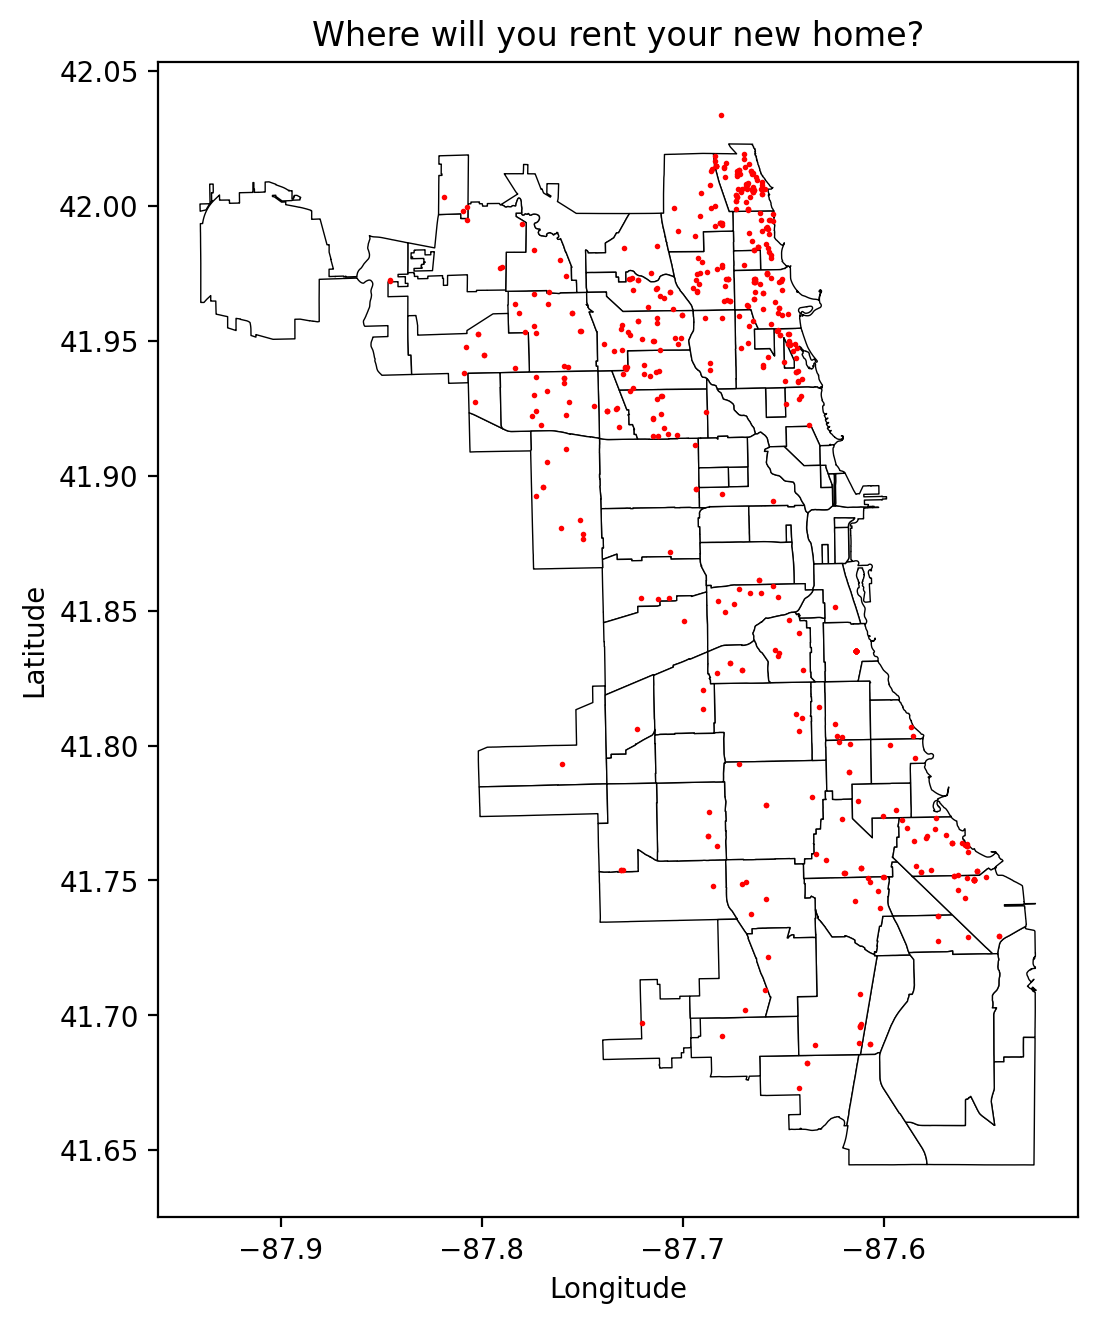

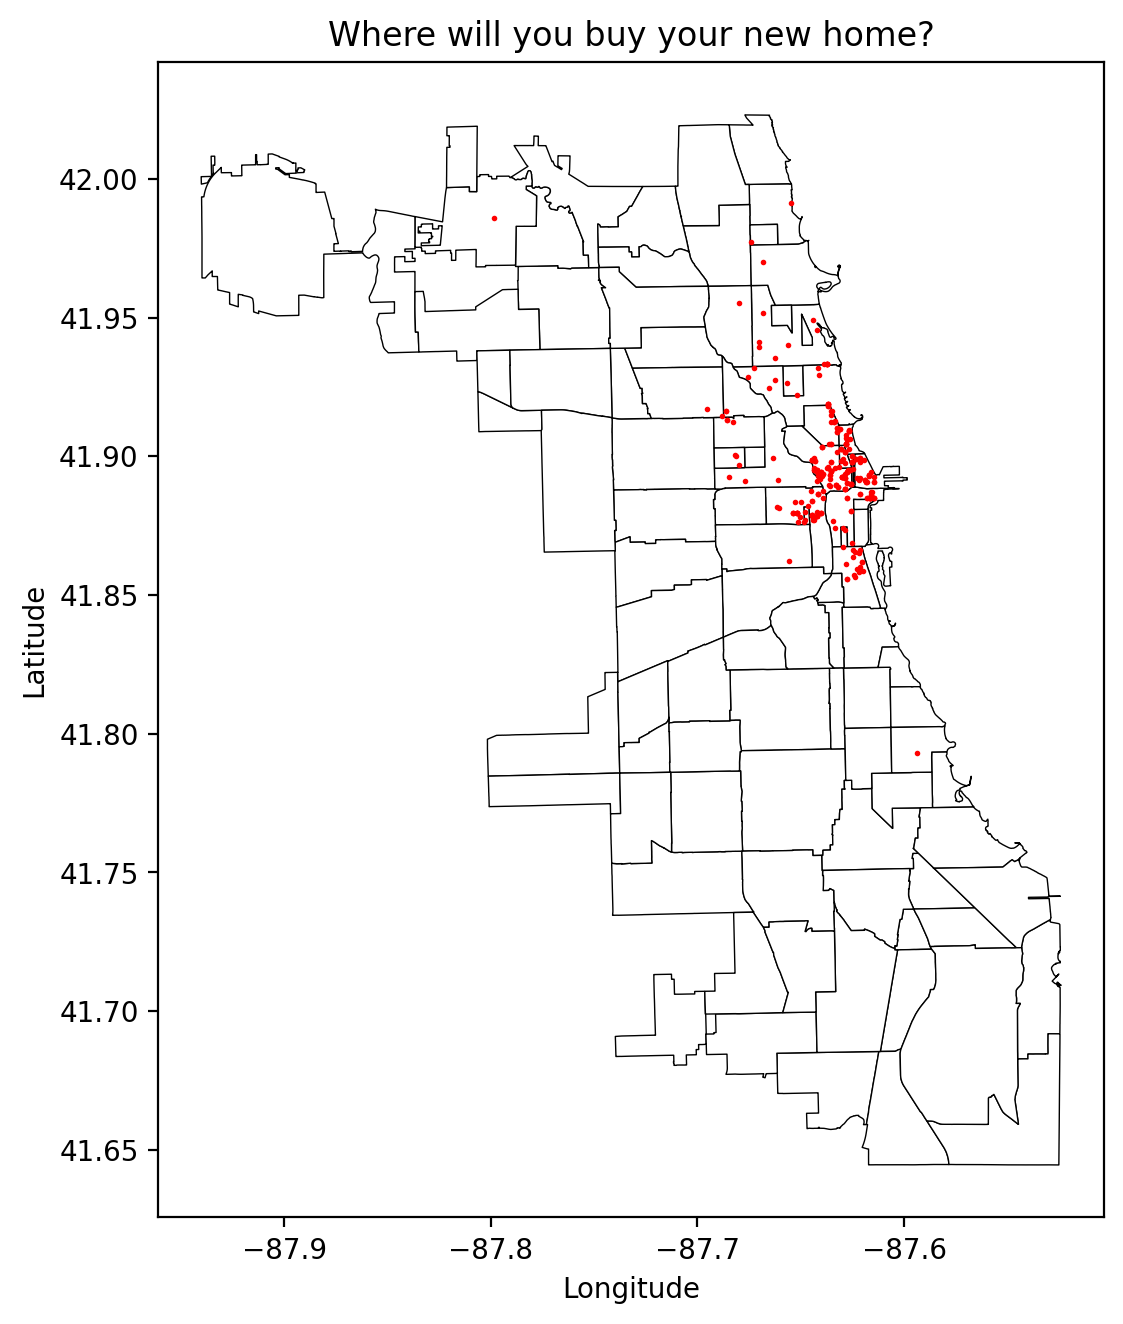

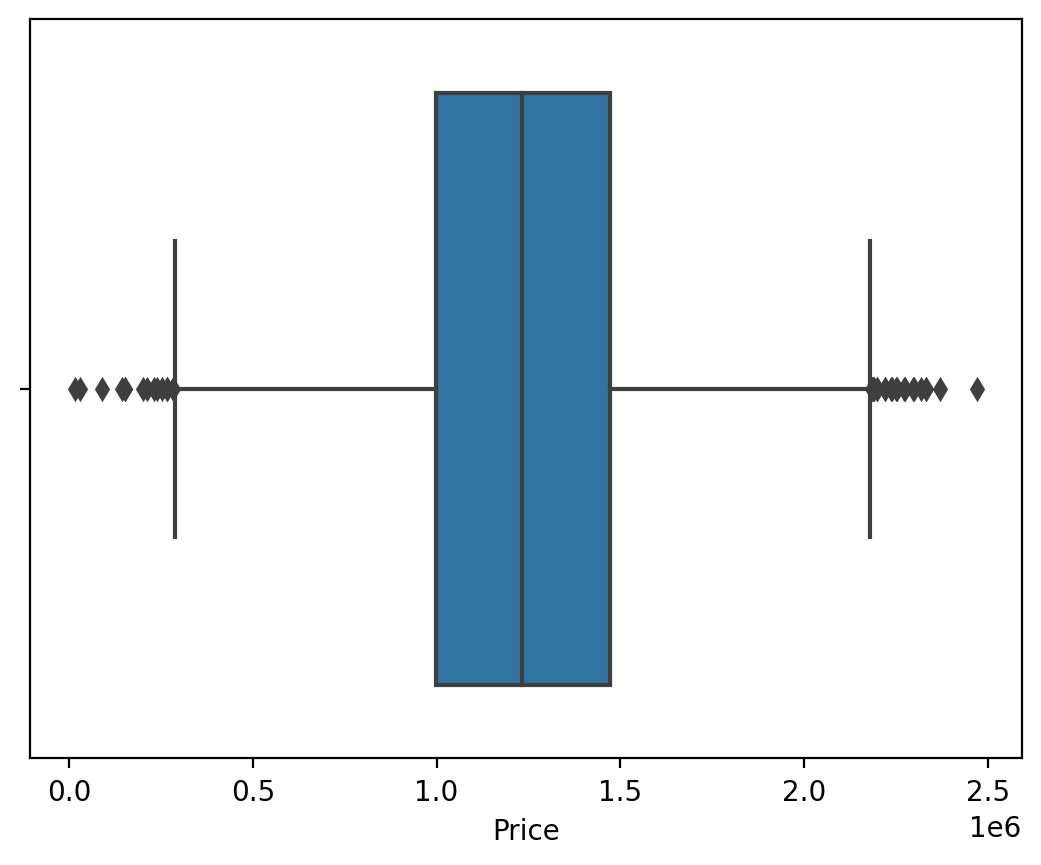

<Figure size 640x480 with 0 Axes>

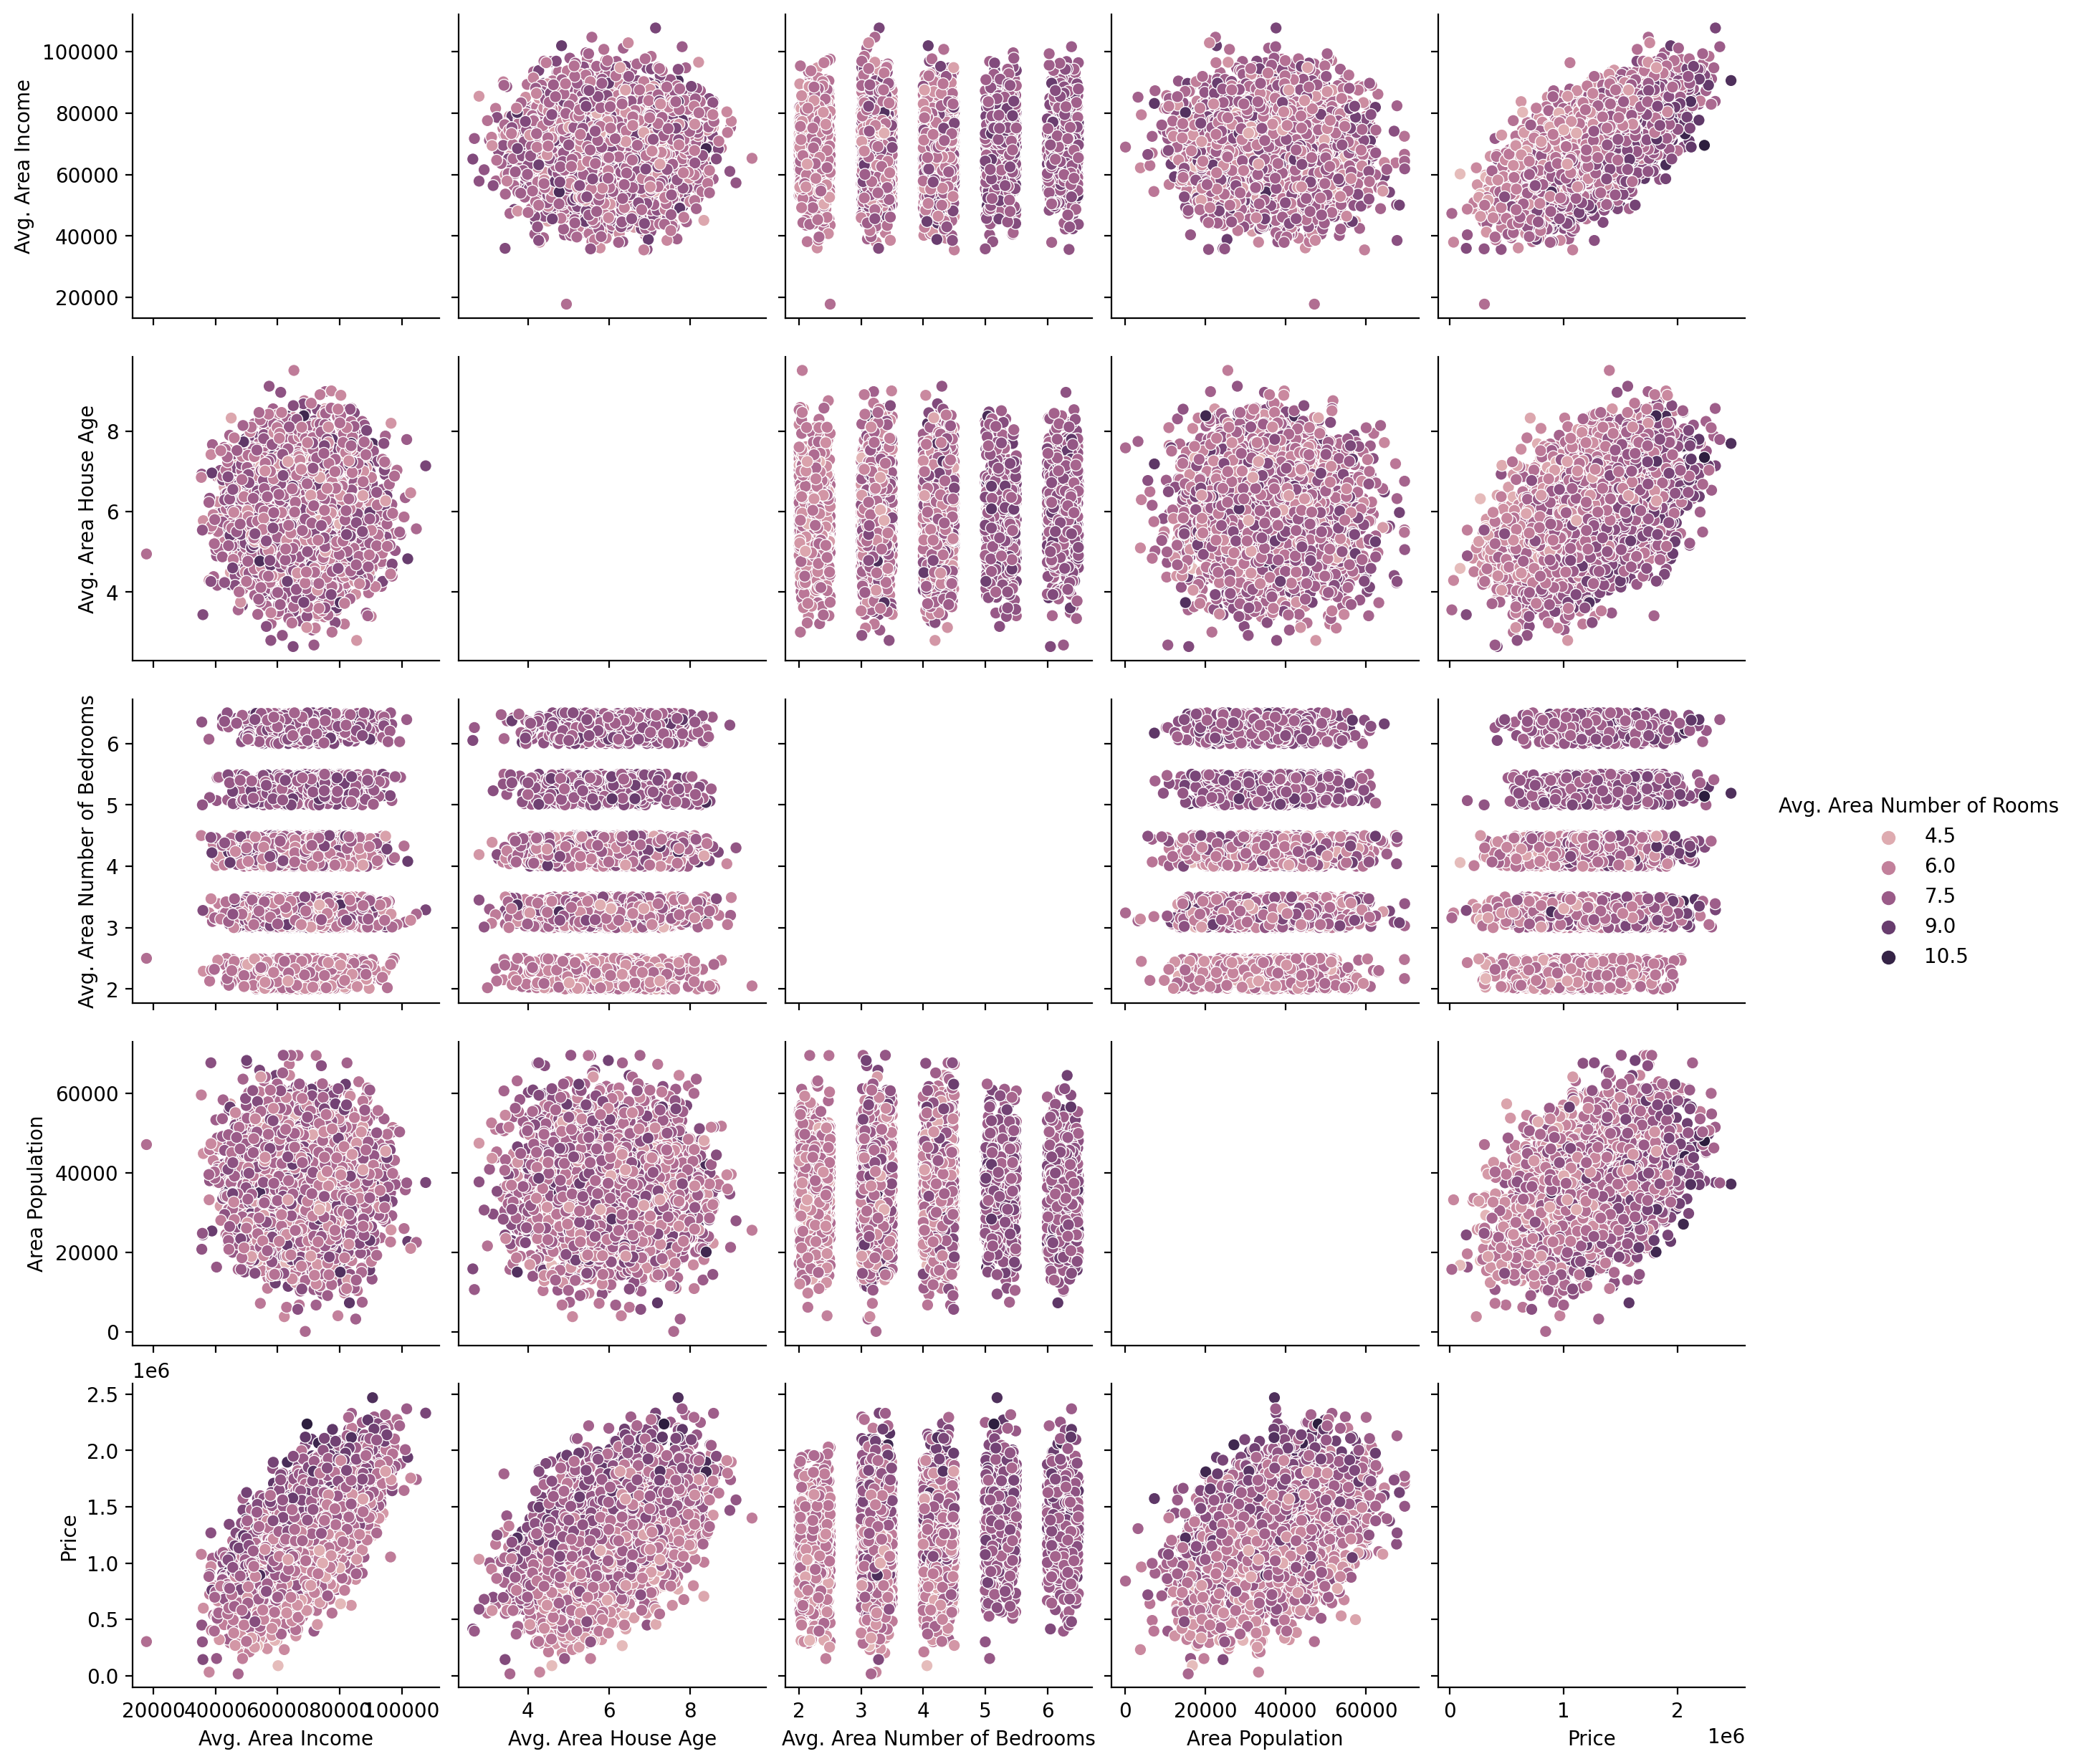

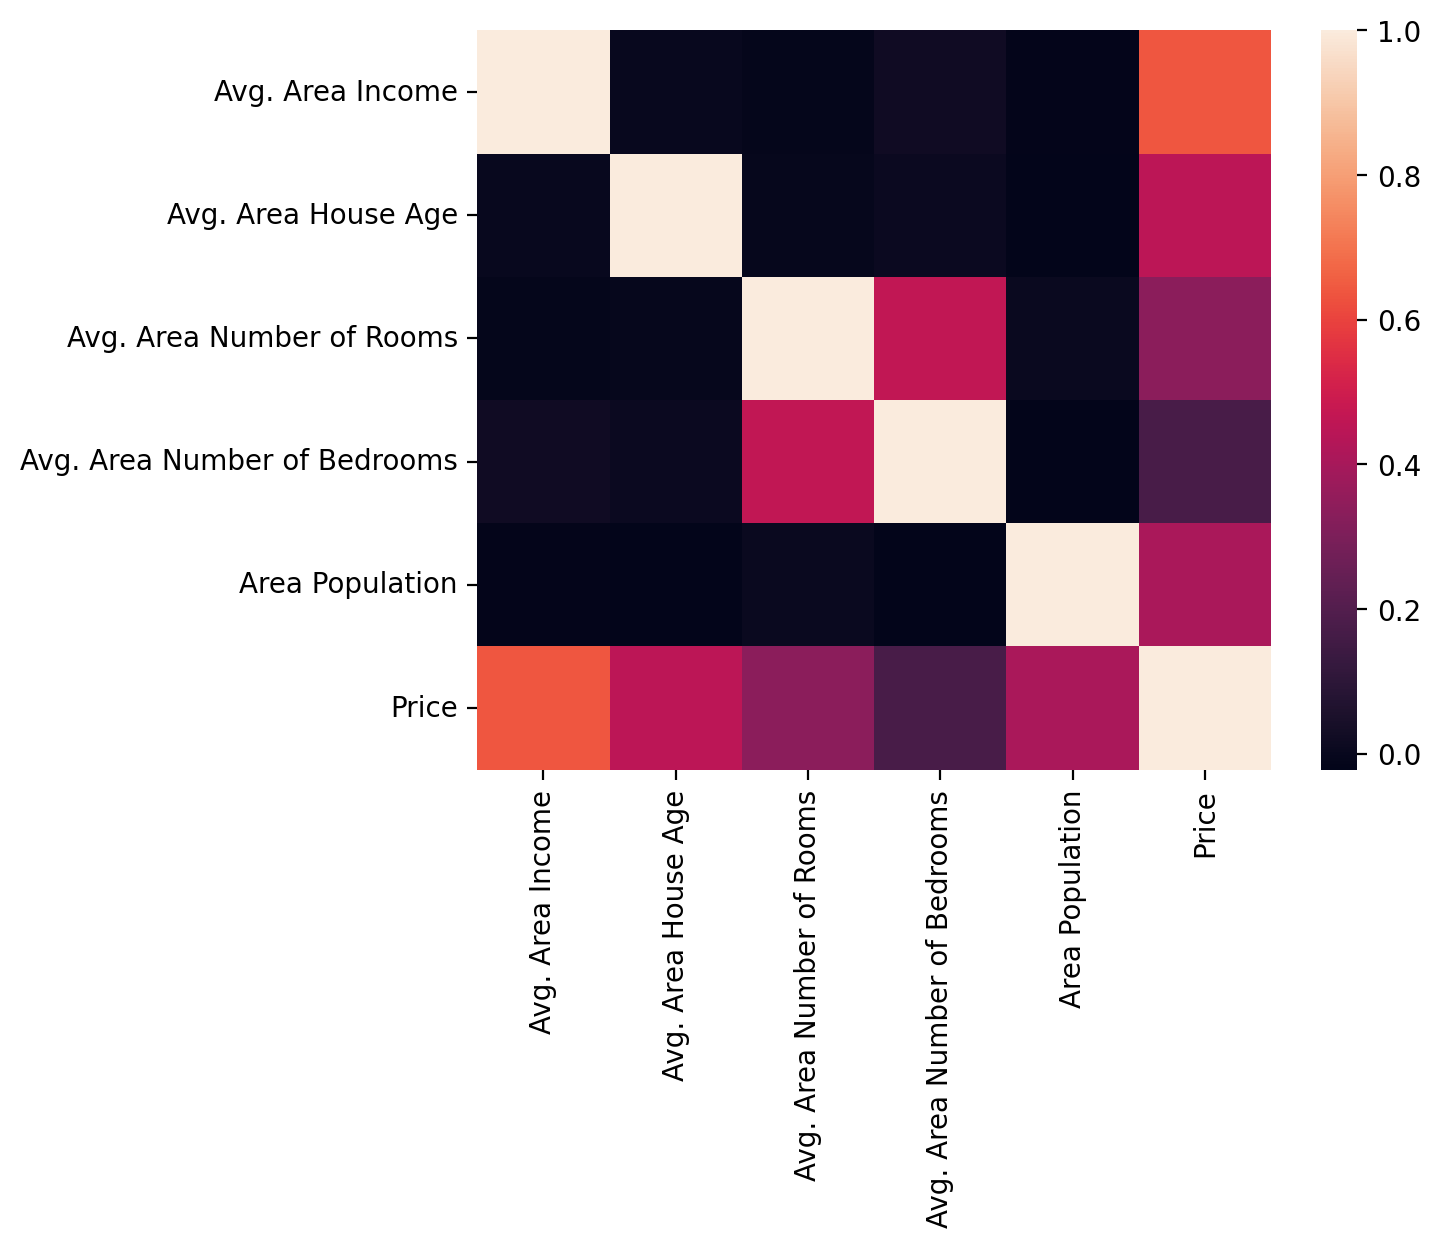

<Figure size 640x480 with 0 Axes>

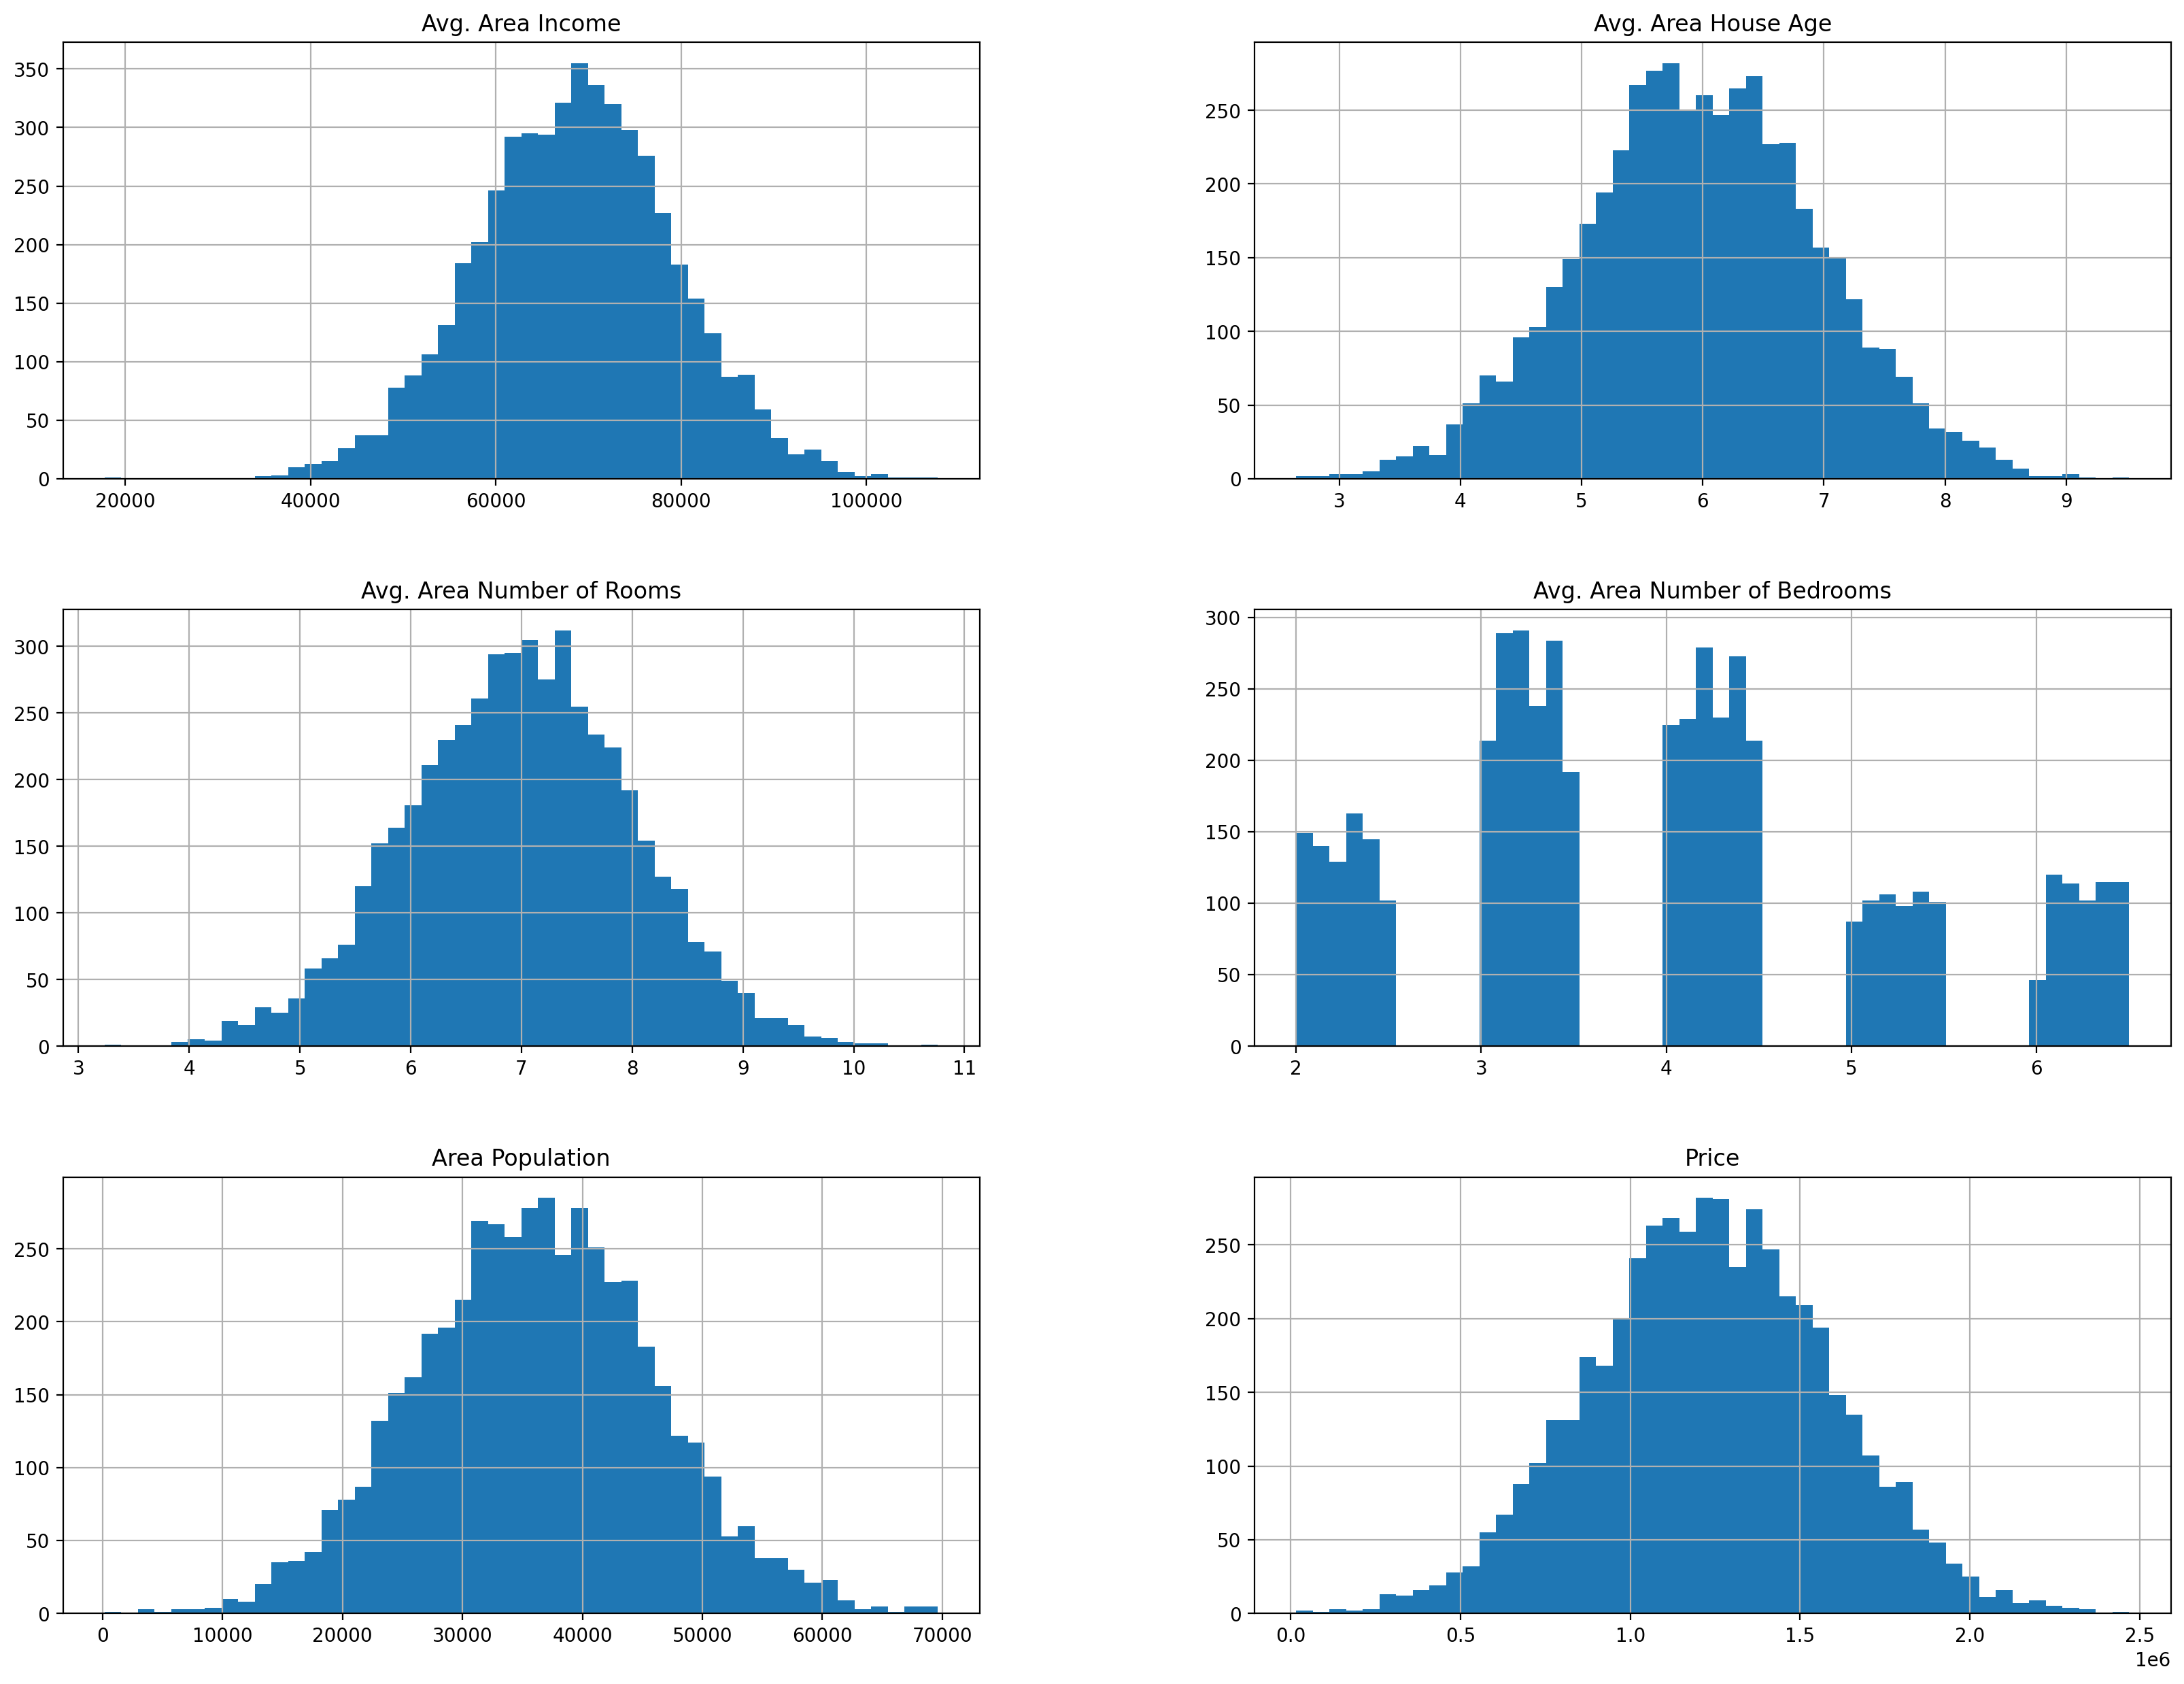

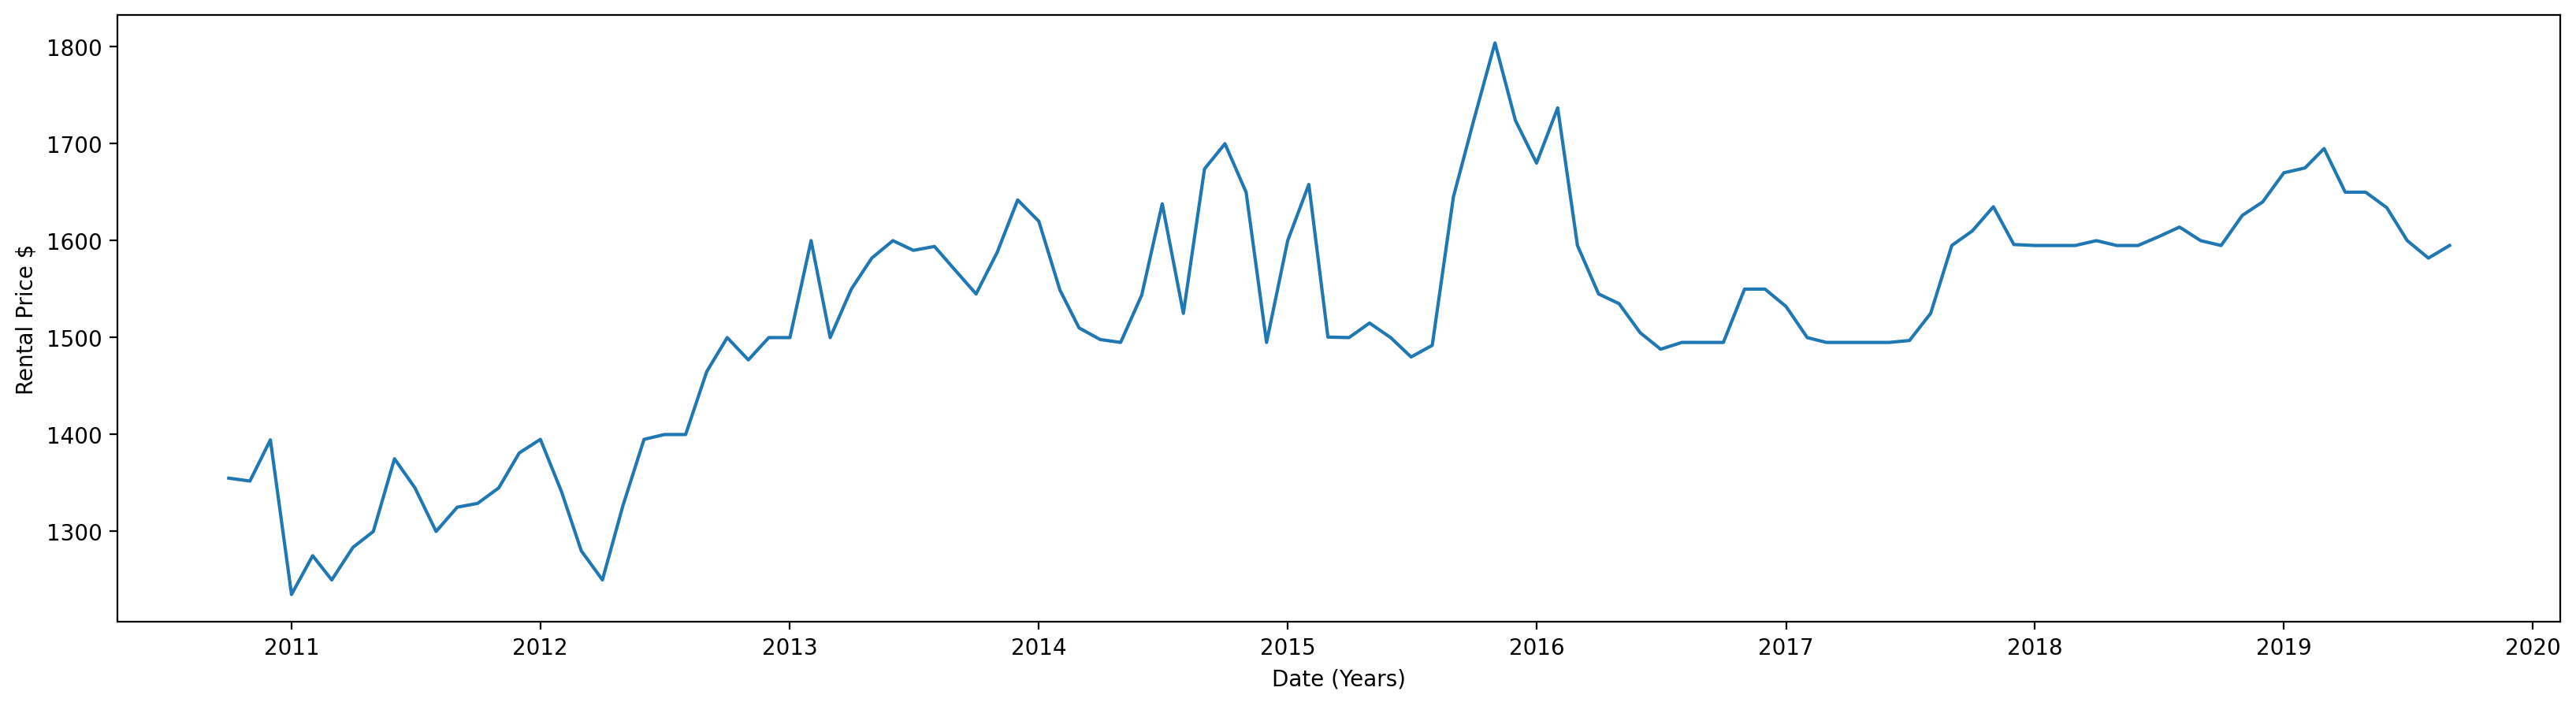

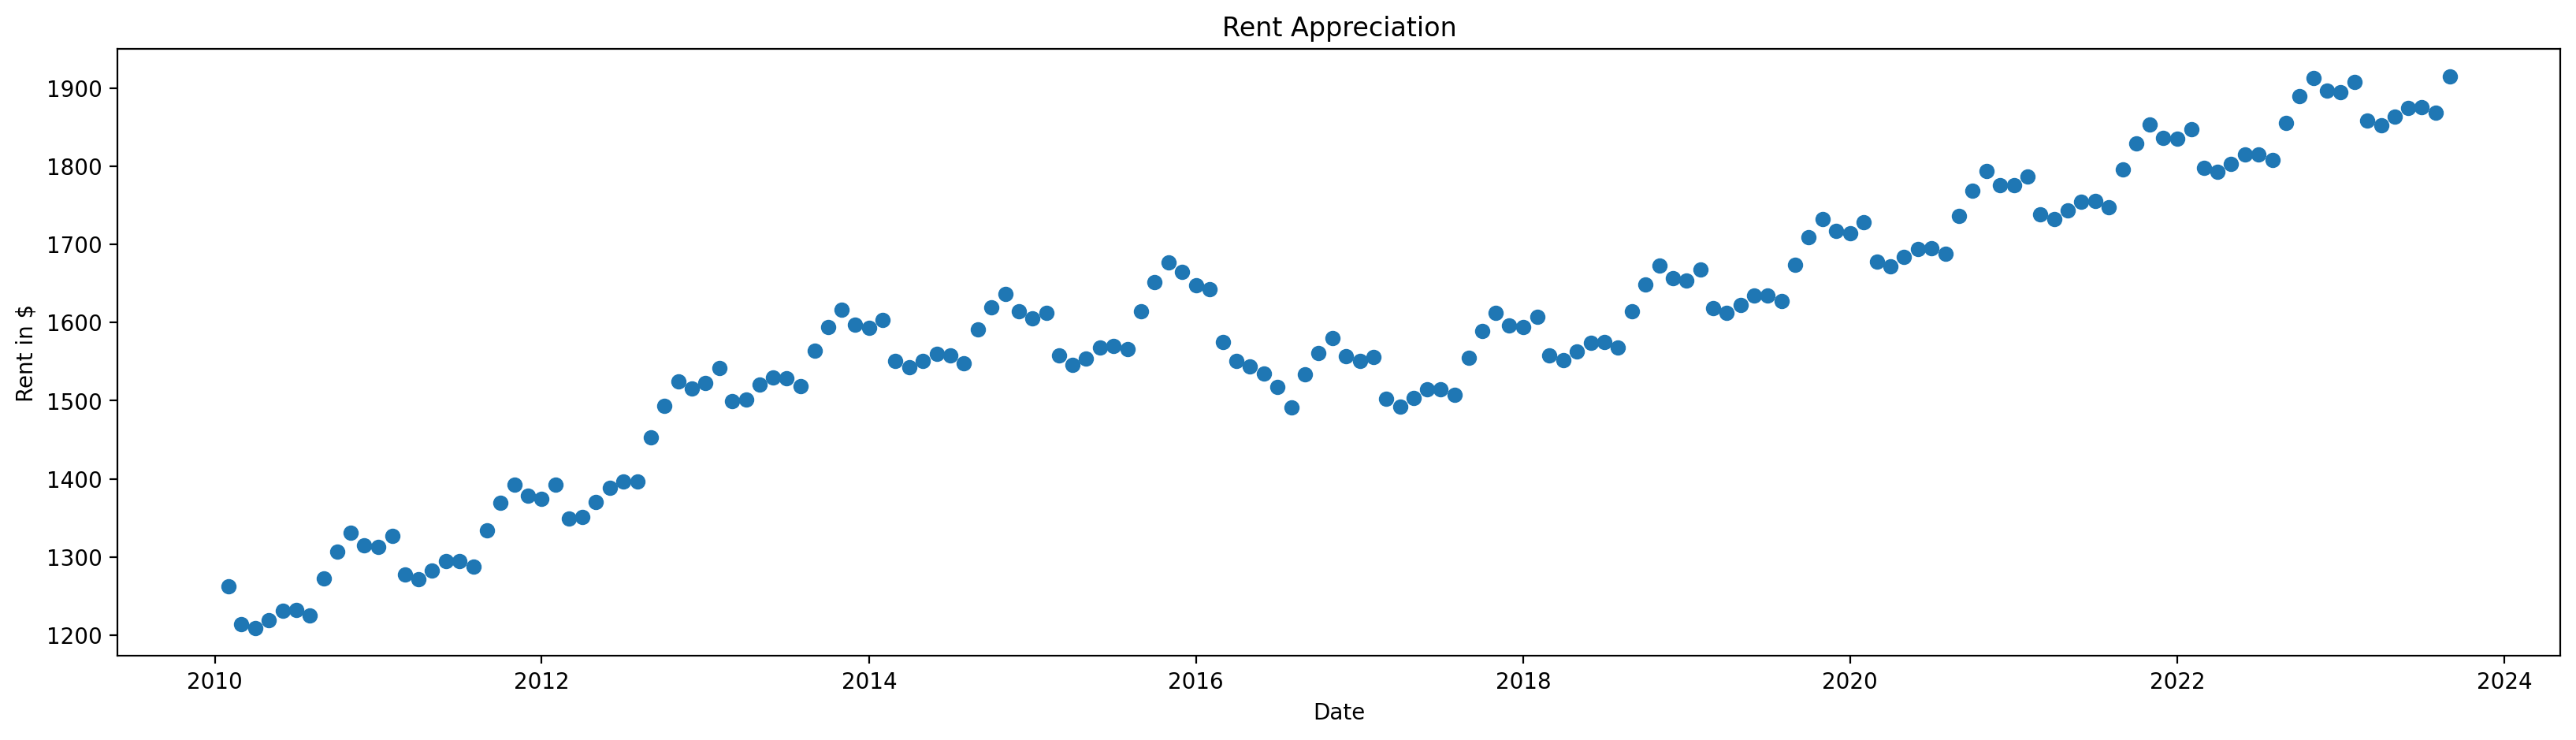

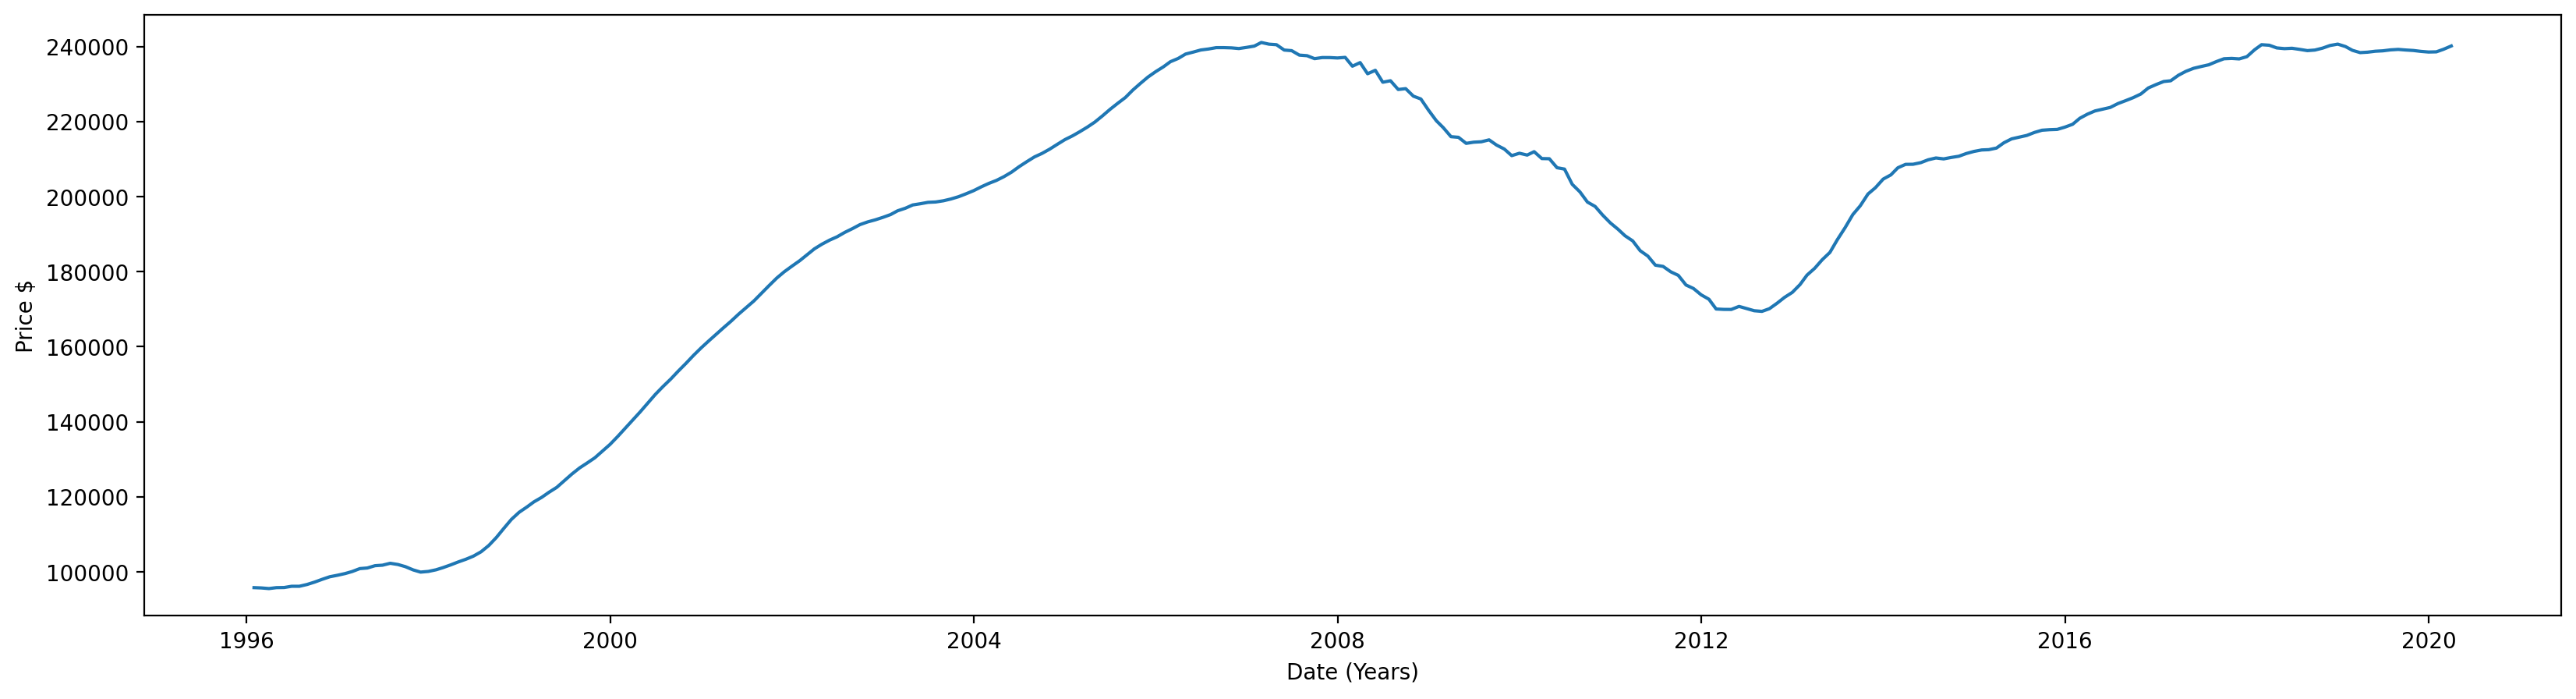

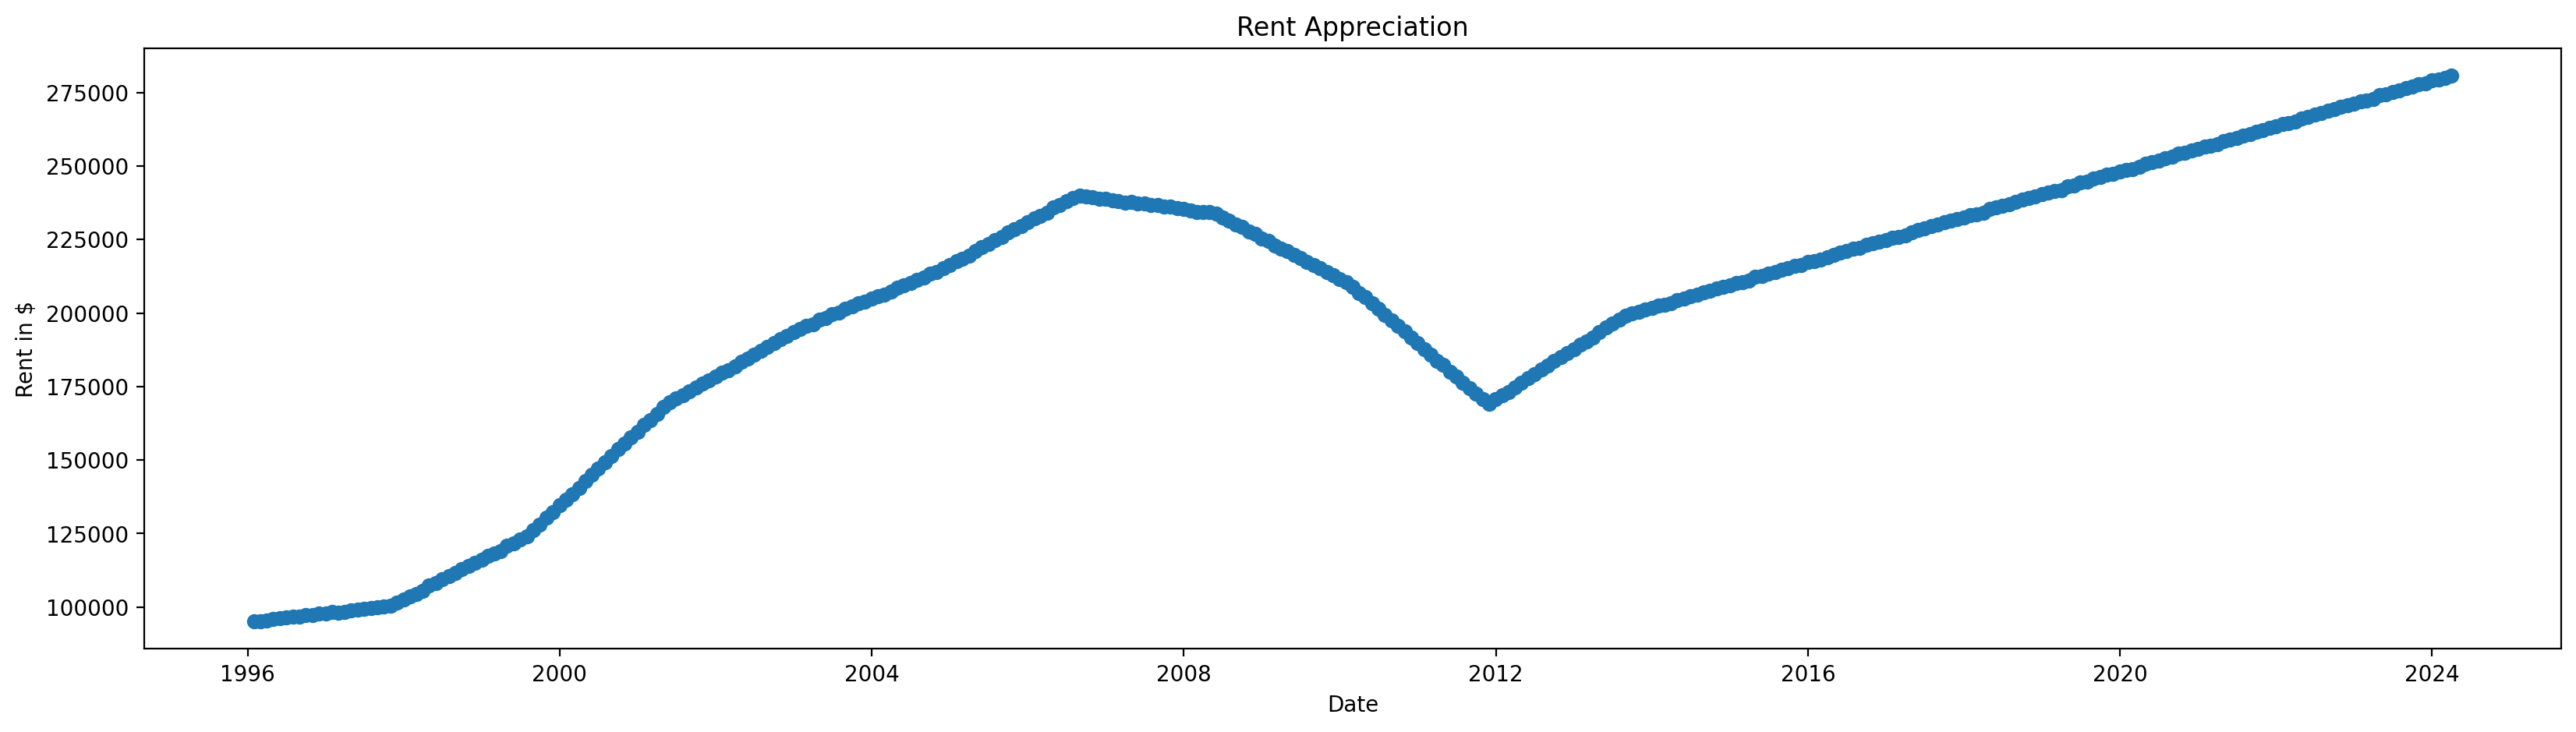

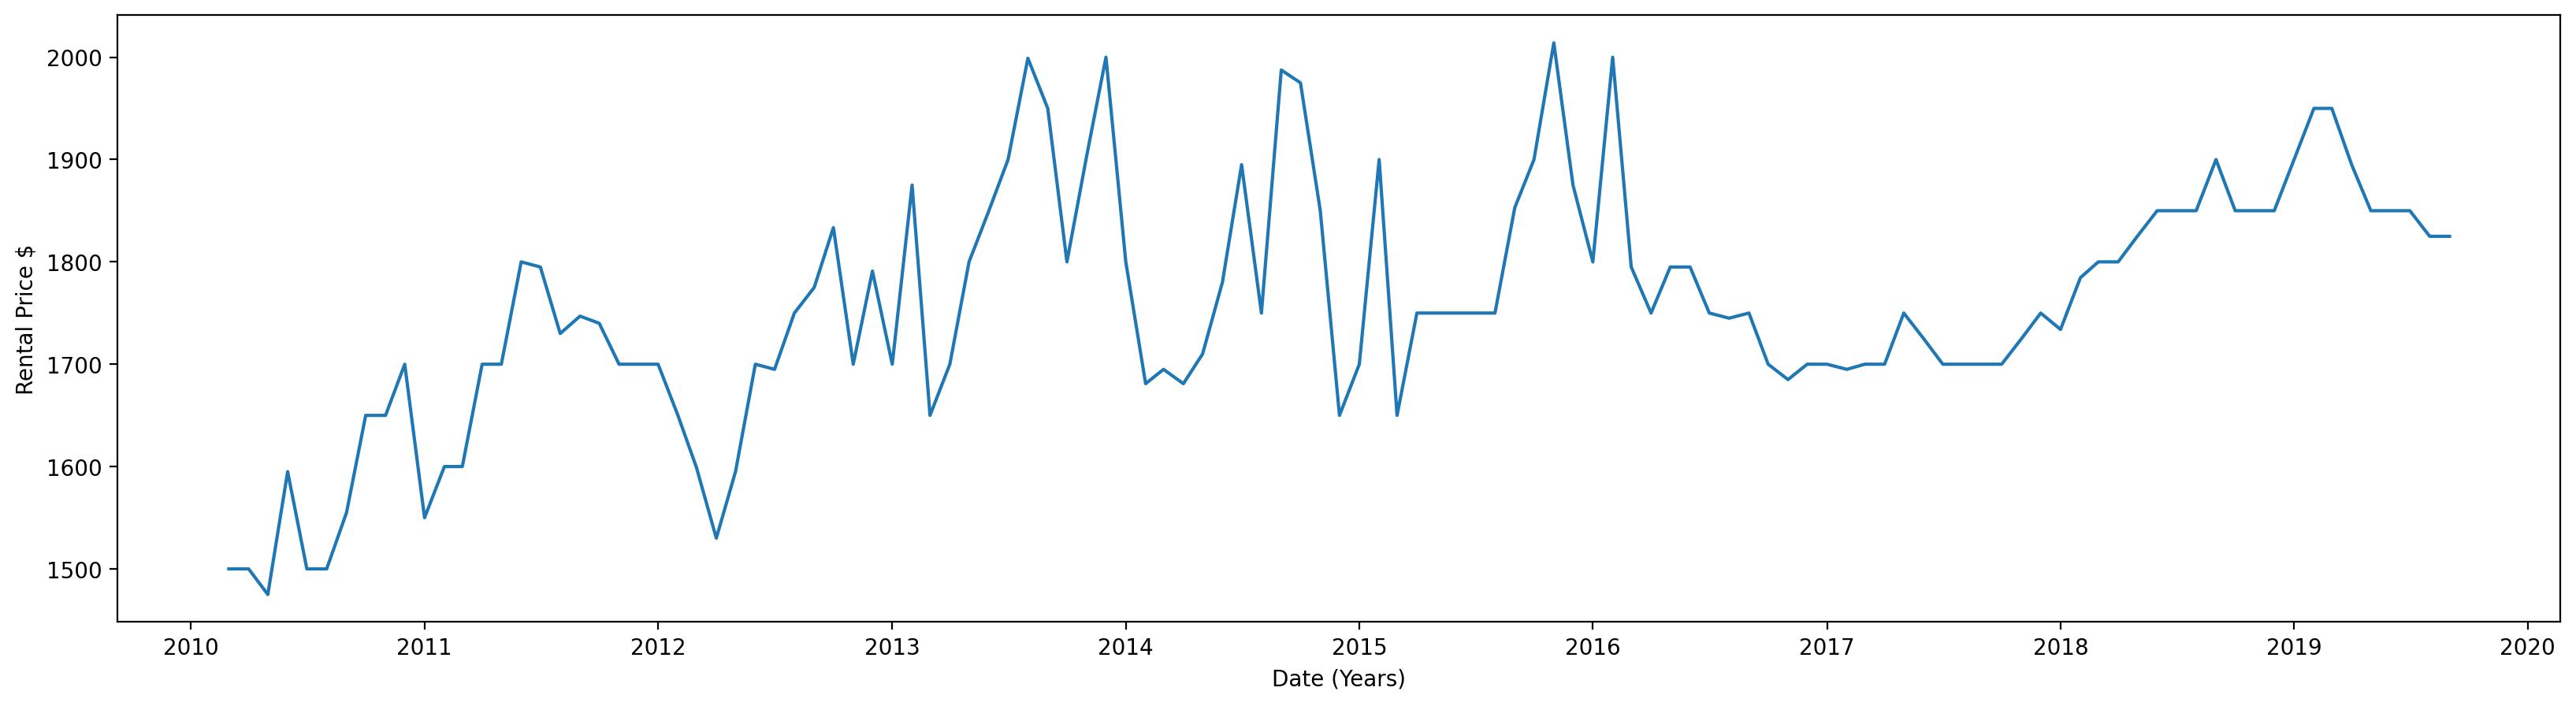

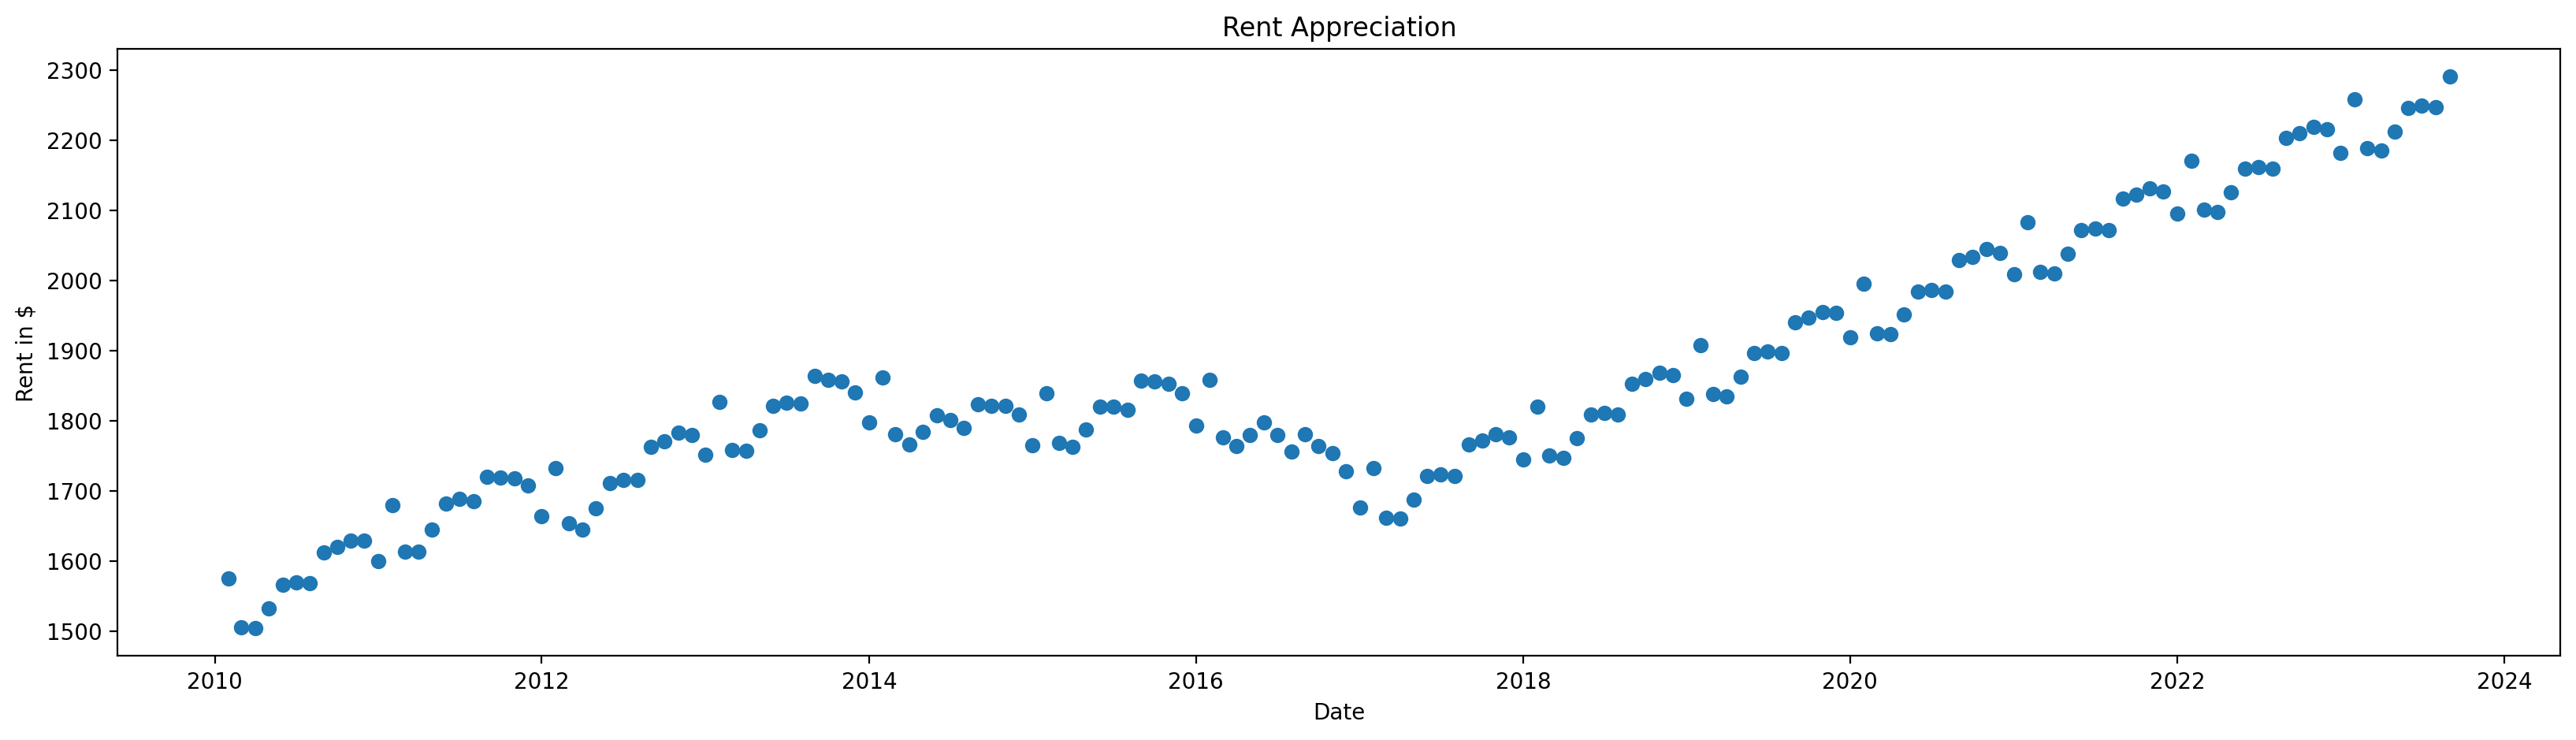

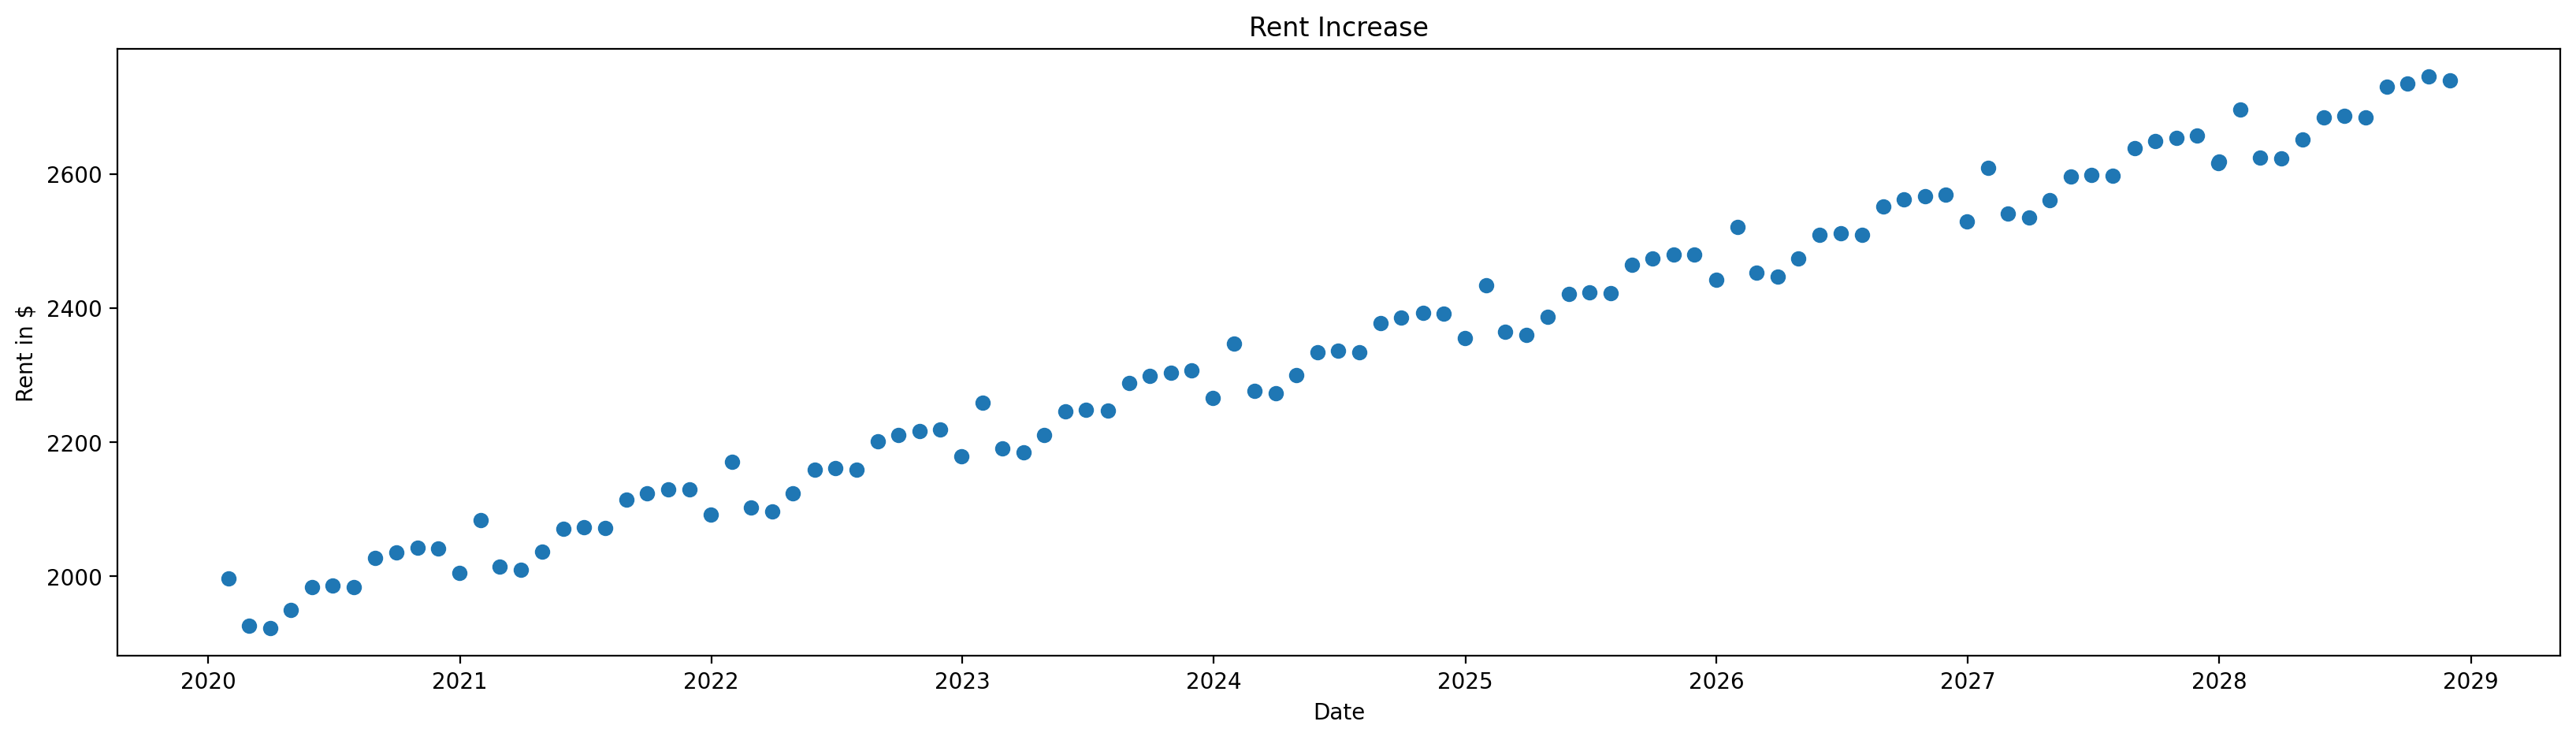

In [ ]:
app = Flask(__name__, template_folder = '/content')
run_with_ngrok(app)  # Start ngrok when app is run

desired_city = ""
income = ""
industry = ""
credit_score = ""
checking_savings = ""
rent_as_percent_of_salary = ""
bedrooms = ""
stay = ""
marital_status = ""
roommates = ""
kids = ""
car_payments = ""
student_loans = ""
savings_preference = ""
financial_liabilities = ""
df_rent = pd.DataFrame()
df_sale = pd.DataFrame()


@app.route('/')
def index():
  #return "TEST"
  return render_template("drive/MyDrive/Data Crunchers/front_end/index.html")

@app.route('/index')
def home():
  #return "TEST"
  return render_template("drive/MyDrive/Data Crunchers/front_end/index.html")

@app.route('/input_form')
def input_form():
  #return "TEST"
  return render_template("drive/MyDrive/Data Crunchers/front_end/input_form.html")

@app.route('/result', methods=['POST'])
def result():
  try:
    global df_rent, df_sale, desired_city, income, industry, credit_score, checking_savings, rent_as_percent_of_salary, bedrooms, stay, marital_status, roommates, kids, car_payments, student_loans, savings_preference, financial_liabilities
    desired_city = request.form['city']
    income = float(request.form['salary'])
    industry = request.form['industry']
    credit_score = int(request.form['credit-score'])
    checking_savings = float(request.form['account'])
    rent_as_percent_of_salary = float(request.form['spend'])
    bedrooms = int(request.form['bedrooms'])
    stay = float(request.form['stay'])
    marital_status = request.form['married']
    roommates = int(request.form['roommates'])
    kids = int(request.form['kids'])
    car_payments = float(request.form['car'])
    student_loans = float(request.form['loans'])
    savings_preference = float(request.form['save'])
    financial_liabilities = float(request.form['other'])

    #calculating monthly budget
    budget = income - student_loans - car_payments - savings_preference - financial_liabilities
    if industry in ['tech', 'finance', 'healthcare']:
      career_type = 1
    elif industry in ['education', 'entertainment', 'government', 'construction', 'hospitality']:
        career_type = 2
    else:
        career_type = 3
    if career_type == 1:
      standard_deviation = 0.1 * income
      rent_monthly = (budget - standard_deviation) * (0.3 - kids * 0.03) / (1 + 0.3)
    elif career_type == 2:
        standard_deviation = 0.2 * income
        rent_monthly = (budget - standard_deviation) * (0.3 - kids * 0.03) / (1 + 0.3)
    elif career_type == 3:
        standard_deviation = 0.5 * income
        rent_monthly = (budget - standard_deviation) * (0.3 - kids * 0.03) / (1 + 0.3)

    rent_monthly_format = format(rent_monthly, '.2f')
    #FORECASTING INCOME
    growth_rates = {'tech': 1.05, 'finance': 1.02, 'healthcare': 1.03, 'education': 1.01, 'entertainment': 1.01, 'government': 1.02, 'construction': 1.02, 'hospitality': 1.02}


    # Check if industry is valid
    if industry not in growth_rates:
      growth_rate = 1.02
    else:
        # Calculate the growth rate based on industry
        growth_rate = growth_rates[industry]

        # Calculate the income for the next 10 years based on linear regression

        years = np.array(range(1, 11)).reshape(-1, 1)
        income_forecast = [income *12]
        for i in range(1, 10):
            income_forecast.append(income_forecast[i-1] * growth_rate)
    income_forecast_sum = sum(income_forecast[:int(stay)])
    #RENT OR BUY ALGORITHM
    recommendation = ""
    annual_income = income * 12
    # Check if income is sufficient to afford a home in the desired city
    if income_forecast_sum > 50000:
        recommendation += "You can consider buying a home in {}.\n".format(desired_city)
    else:
        recommendation += "You should consider renting a home in {} because your income may not be sufficient to afford paying mortgage and downpayment for a home there.\n".format(desired_city)

    # Check if credit score is high enough to qualify for a mortgage
    if credit_score >= 700:
        recommendation += "Your credit score is good enough to qualify for a mortgage.\n"
    else:
        recommendation += "Your credit score may not be high enough to qualify for a mortgage.\n"

    # Check if savings is enough for a down payment
    if checking_savings >= 50000:
        recommendation += "You have enough savings for a down payment on a home.\n"
    else:
        recommendation += "Your savings may not be enough for a down payment on a home.\n"

    # Check if debt-to-income ratio is acceptable
    dti = (car_payments + student_loans + financial_liabilities) / income
    if dti < 0.4:
        recommendation += "Your debt-to-income ratio is acceptable.\n"
    else:
        recommendation += "Your debt-to-income ratio may be too high to qualify for a mortgage.\n"

    # Check if rent is less than 30% of income
    if (annual_income * stay) * (rent_as_percent_of_salary / 100) < (annual_income * stay) * 0.3:
        recommendation += "Your rent is less than 30% of your income.\n"
    else:
        recommendation += "Your rent may be too high relative to your income.\n"

    # Check if stay is less than 2 years
    if stay <= 2:
        recommendation += "Since you only plan on staying for a year, you should consider renting a home instead of buying.\n"

    # Check number of bedrooms
    if bedrooms == 1:
        recommendation += "You may want to consider renting a one-bedroom apartment instead of buying a home, since it may be more affordable.\n"

    # Check if marital status is single and if there are no roommates or kids
    if marital_status == 'single' and roommates == 0 and kids == 0:
        recommendation += "Since you're single and have no roommates or kids, you may want to consider renting a smaller space instead of buying a home.\n"

    #RENT
    var_coeff = 0.75

    query = "SELECT * FROM mole_rent WHERE city = %s AND bedrooms = %s AND price >= %s AND price <= %s"
    df_rent = pd.read_sql(query, con=engine, params=[desired_city, bedrooms, rent_monthly*var_coeff, rent_monthly])


    #BUY
    query = "SELECT * FROM mole_sale WHERE city = %s AND bedrooms = %s"
    df_sale = pd.read_sql(query, con=engine, params=[desired_city, bedrooms])
    #df_sale.info()

    #Applying the mortgage calculator function to the dataframe
    df_sale['monthly_mortgage'] = df_sale.apply(calculate_mortgage_monthly,
                                                args=(int(checking_savings), down_payment_percentage, loan_term_years, int(credit_score)),
                                                axis=1)
    #df_sale['monthly_mortgage'] = df_sale['monthly_mortgage'].round(0)
    df_sale['monthly_mortgage'] = df_sale['monthly_mortgage'].astype(int)
    df_sale['price'] = df_sale['price'].astype(int)
    df_sale = df_sale[(df_sale['monthly_mortgage'] > rent_monthly * var_coeff) & (df_sale['monthly_mortgage'] < rent_monthly)]

    return render_template("drive/MyDrive/Data Crunchers/front_end/output_df.html", rent_monthly_format=rent_monthly_format, df_rent=df_rent[0:10], df_sale=df_sale[0:10], recommendation=recommendation)
  except Exception as e:
    print(e)
    return "An error occurred: " + str(e)

@app.route('/fred')
def fred():
  try:
    housing = pd.read_sql("SELECT * FROM fred_housing", con=engine)
    userIncome = int(income)
    WantedBedrooms = float(bedrooms)
    filterone = housing[housing['Avg. Area Income'] >= userIncome]
    filtertwo = filterone[filterone['Avg. Area Number of Bedrooms'] >= WantedBedrooms]

    #plt.figure()
    #housing.boxplot(column='Price')
    #fig1 = get_raw_fig(plt)

    import seaborn as sns
    plt.figure()
    sns.boxplot(x='Price', data=housing)
    fig1 = get_raw_fig(plt)
    images = [fig1]

    plt.figure()
    sns.pairplot(housing.drop('Address', axis=1), hue='Avg. Area Number of Rooms')
    fig2 = get_raw_fig(plt)
    images.append(fig2)

    plt.figure()
    sns.heatmap(housing.corr())
    fig3 = get_raw_fig(plt)
    images.append(fig3)

    plt.figure()
    housing.hist(bins=50, figsize=(20,15))
    fig4 = get_raw_fig(plt)
    images.append(fig4)
    #temp = sns.pairplot(housing.drop('Address', axis=1), hue='Avg. Area Number of Rooms').fig
    #images = [fig1]

    #fig2 = plt.figure()
    #sns.pairplot(housing.drop('Address', axis=1), hue='Avg. Area Number of Rooms')
    #raw_fig2 = get_raw_fig(fig2)

    #images = [fig1, fig2]
    #images.append(fig2)
    return render_template("drive/MyDrive/Data Crunchers/front_end/fred.html", images=images)

  except Exception as e:
    print(e)
    return "An error occurred: " + str(e)

@app.route('/appreciation')
def appreciation():
  try:
    #RENT
    if bedrooms == 1:
      df_rent_reg = pd.read_sql("SELECT * FROM rent_med_1b", con=engine)
      df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_rent_reg.shape[1]):
          if df_rent_reg.columns[i][:5] == '1Bed_':
              df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
    if bedrooms == 2:
      df_rent_reg = pd.read_sql("SELECT * FROM rent_med_2b", con=engine)
      df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_rent_reg.shape[1]):
          if df_rent_reg.columns[i][:5] == '2Bed_':
              df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
    if bedrooms == 3:
      df_rent_reg = pd.read_sql("SELECT * FROM rent_med_3b", con=engine)
      df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_rent_reg.shape[1]):
          if df_rent_reg.columns[i][:5] == '3Bed_':
              df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
    if bedrooms == 4:
      df_rent_reg = pd.read_sql("SELECT * FROM rent_med_4b", con=engine)
      df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_rent_reg.shape[1]):
          if df_rent_reg.columns[i][:5] == '4Bed_':
              df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
    if bedrooms >= 5:
      df_rent_reg = pd.read_sql("SELECT * FROM rent_med_5b", con=engine)
      df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_rent_reg.shape[1]):
          if df_rent_reg.columns[i][:5] == '5BedroomOrMore_':
              df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
    df_rent_reg = pd.melt(df_rent_reg, id_vars=['RegionName'], var_name='Date', value_name='Price')

    # sort the DataFrame by Date and reset the index
    df_rent_reg = df_rent_reg.sort_values('Date').reset_index(drop=True)
    df_rent_reg = df_rent_reg.drop(index=df_rent_reg.tail(7).index)
    df_rent_reg = df_rent_reg.drop('RegionName', axis=1)
    # transform all values in column 'B' into datetime format
    df_rent_reg['Date'] = pd.to_datetime(df_rent_reg['Date'], format='%Y-%m-%d')
    df_rent_reg = df_rent_reg.rename(columns={'Date': 'ds', 'Price': 'y'})
    plt.rcParams['figure.figsize'] = (20, 5)

    #PLOT#1
    fig, ax = plt.subplots()
    ax.plot(df_rent_reg["ds"], df_rent_reg["y"])
    ax.set_xlabel("Date (Years)")
    ax.set_ylabel("Rental Price $")
    fig = get_raw_fig(fig)
    images = [fig]

    #PLOT#2
    train_df = df_rent_reg
    test_size = 48
    # Initialize the model
    model = NeuralProphet()
    # Fit the model to the training data
    metrics = model.fit(train_df, freq='M')
    # Generate predictions for the next 48 months (entire time series data)
    future = model.make_future_dataframe(df_rent_reg, periods=test_size, n_historic_predictions=len(df_rent_reg))
    forecast = model.predict(future)
    # Calculate the Mean Absolute Percentage Error (MAPE) on the entire data
    mape = ((forecast['yhat1'] - df_rent_reg['y']) / df_rent_reg['y']).abs().mean() * 100
    fig2 = model.plot(forecast)
    #fig2 = get_raw_fig(fig2)
    img = fig2.to_image(format='png')
    img_bytes = io.BytesIO(img)
    img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
    images.append(img_base64)
    #images.append(fig2)
    #fig_json = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)

    #PLOT#3
    forecast_data = forecast[['ds', 'yhat1']]
    # Extract the x and y values from the forecast_data DataFrame
    x = forecast_data['ds']
    y = forecast_data['yhat1']
    plt.figure()
    # Create a scatterplot
    plt.scatter(x, y)
    # Set the title and labels
    plt.title('Rent Appreciation')
    plt.xlabel('Date')
    plt.ylabel('Rent in $')
    fig3 = get_raw_fig(plt)
    images.append(fig3)

    #BUY
    if bedrooms == 1:
      df_reg = pd.read_sql("SELECT * FROM zillow_price_1Bed", con=engine)
      df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_reg.shape[1]):
          if df_reg.columns[i][:5] == '1Bed_':
              df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
    if bedrooms == 2:
      df_reg = pd.read_sql("SELECT * FROM zillow_price_2Bed", con=engine)
      df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_reg.shape[1]):
          if df_reg.columns[i][:5] == '2Bed_':
              df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
    if bedrooms == 3:
      df_reg = pd.read_sql("SELECT * FROM zillow_price_3Bed", con=engine)
      df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_reg.shape[1]):
          if df_reg.columns[i][:5] == '3Bed_':
              df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
    if bedrooms == 4:
      df_reg = pd.read_sql("SELECT * FROM zillow_price_4Bed", con=engine)
      df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_reg.shape[1]):
          if df_reg.columns[i][:5] == '4Bed_':
              df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
    if bedrooms >= 5:
      df_reg = pd.read_sql("SELECT * FROM zillow_price_5BedroomOrMore", con=engine)
      df_reg = df_reg[df_reg['RegionName'].isin([desired_city])]
      for i in range(8, df_reg.shape[1]):
          if df_reg.columns[i][:5] == '5BedroomOrMore_':
              df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)

    df_reg = pd.melt(df_reg, id_vars=['RegionName'], var_name='Date', value_name='Price')
    # sort the DataFrame by Date and reset the index
    df_reg = df_reg.sort_values('Date').reset_index(drop=True)
    df_reg = df_reg.drop(index=df_reg.tail(7).index)
    df_reg = df_reg.drop('RegionName', axis=1)
    # transform all values in column 'B' into datetime format
    df_reg['Date'] = pd.to_datetime(df_reg['Date'], format='%Y-%m-%d')
    df_reg = df_reg.rename(columns={'Date': 'ds', 'Price': 'y'})
    #PLOT#1
    fig4, ax = plt.subplots()
    ax.plot(df_reg["ds"], df_reg["y"])
    ax.set_xlabel("Date (Years)")
    ax.set_ylabel("Price $")
    fig4 = get_raw_fig(fig4)
    images.append(fig4)

    #PLOT#2
    train_df = df_reg
    test_size = 48
    # Initialize the model
    model = NeuralProphet()
    # Fit the model to the training data
    metrics = model.fit(train_df, freq='M')
    # Generate predictions for the next 48 months (entire time series data)
    future = model.make_future_dataframe(df_reg, periods=test_size, n_historic_predictions=len(df_reg))
    forecast = model.predict(future)
    # Calculate the Mean Absolute Percentage Error (MAPE) on the entire data
    mape = ((forecast['yhat1'] - df_reg['y']) / df_reg['y']).abs().mean() * 100
    fig5 = model.plot(forecast)
    #fig2 = get_raw_fig(fig2)
    img = fig5.to_image(format='png')
    img_bytes = io.BytesIO(img)
    img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
    images.append(img_base64)
    #images.append(fig2)
    #fig_json = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)

    #PLOT#3
    forecast_data = forecast[['ds', 'yhat1']]
    # Extract the x and y values from the forecast_data DataFrame
    x = forecast_data['ds']
    y = forecast_data['yhat1']
    plt.figure()
    # Create a scatterplot
    plt.scatter(x, y)
    # Set the title and labels
    plt.title('Rent Appreciation')
    plt.xlabel('Date')
    plt.ylabel('Rent in $')
    fig6 = get_raw_fig(plt)
    images.append(fig6)

    return render_template("drive/MyDrive/Data Crunchers/front_end/appreciation.html", images=images, desired_city=desired_city, bedrooms=bedrooms, fig2=fig2)

  except Exception as e:
    print(e)
    return "An error occurred: " + str(e)

@app.route('/appreciation_custom', methods=['POST'])
def appreciation_custom():
  try:
    calc_city = request.form['city']
    calc_bedrooms = int(request.form['bedrooms'])
    calc_rent_buy = int(request.form['rent_buy'])
    calc_amount = int(request.form['amount'])

    if calc_rent_buy == 1:
      #RENT
      calc_str_rent_buy = "rent"
      if calc_bedrooms == 1:
        df_rent_reg = pd.read_sql("SELECT * FROM rent_med_1b", con=engine)
        df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_rent_reg.shape[1]):
            if df_rent_reg.columns[i][:5] == '1Bed_':
                df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
      if calc_bedrooms == 2:
        df_rent_reg = pd.read_sql("SELECT * FROM rent_med_2b", con=engine)
        df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_rent_reg.shape[1]):
            if df_rent_reg.columns[i][:5] == '2Bed_':
                df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
      if calc_bedrooms == 3:
        df_rent_reg = pd.read_sql("SELECT * FROM rent_med_3b", con=engine)
        df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_rent_reg.shape[1]):
            if df_rent_reg.columns[i][:5] == '3Bed_':
                df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
      if calc_bedrooms == 4:
        df_rent_reg = pd.read_sql("SELECT * FROM rent_med_4b", con=engine)
        df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_rent_reg.shape[1]):
            if df_rent_reg.columns[i][:5] == '4Bed_':
                df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
      if calc_bedrooms >= 5:
        df_rent_reg = pd.read_sql("SELECT * FROM rent_med_5b", con=engine)
        df_rent_reg = df_rent_reg[df_rent_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_rent_reg.shape[1]):
            if df_rent_reg.columns[i][:5] == '5BedroomOrMore_':
                df_rent_reg.rename(columns={df_rent_reg.columns[i]: df_rent_reg.columns[i][5:]}, inplace=True)
      df_rent_reg = pd.melt(df_rent_reg, id_vars=['RegionName'], var_name='Date', value_name='Price')

      # sort the DataFrame by Date and reset the index
      df_rent_reg = df_rent_reg.sort_values('Date').reset_index(drop=True)
      df_rent_reg = df_rent_reg.drop(index=df_rent_reg.tail(7).index)
      df_rent_reg = df_rent_reg.drop('RegionName', axis=1)
      # transform all values in column 'B' into datetime format
      df_rent_reg['Date'] = pd.to_datetime(df_rent_reg['Date'], format='%Y-%m-%d')
      df_rent_reg = df_rent_reg.rename(columns={'Date': 'ds', 'Price': 'y'})
      plt.rcParams['figure.figsize'] = (20, 5)

      #PLOT#1
      fig, ax = plt.subplots()
      ax.plot(df_rent_reg["ds"], df_rent_reg["y"])
      ax.set_xlabel("Date (Years)")
      ax.set_ylabel("Rental Price $")
      fig = get_raw_fig(fig)
      images = [fig]

      #PLOT#2
      train_df = df_rent_reg
      test_size = 48
      # Initialize the model
      model = NeuralProphet()
      # Fit the model to the training data
      metrics = model.fit(train_df, freq='M')
      # Generate predictions for the next 48 months (entire time series data)
      future = model.make_future_dataframe(df_rent_reg, periods=test_size, n_historic_predictions=len(df_rent_reg))
      forecast = model.predict(future)
      # Calculate the Mean Absolute Percentage Error (MAPE) on the entire data
      mape = ((forecast['yhat1'] - df_rent_reg['y']) / df_rent_reg['y']).abs().mean() * 100
      fig2 = model.plot(forecast)
      #fig2 = get_raw_fig(fig2)
      img = fig2.to_image(format='png')
      img_bytes = io.BytesIO(img)
      img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
      images.append(img_base64)
      #images.append(fig2)
      #fig_json = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)

      #PLOT#3
      forecast_data = forecast[['ds', 'yhat1']]
      # Extract the x and y values from the forecast_data DataFrame
      x = forecast_data['ds']
      y = forecast_data['yhat1']
      plt.figure()
      # Create a scatterplot
      plt.scatter(x, y)
      # Set the title and labels
      plt.title('Rent Appreciation')
      plt.xlabel('Date')
      plt.ylabel('Rent in $')
      fig3 = get_raw_fig(plt)
      images.append(fig3)

      #PLOT#4 - Seeding the data
      new_start_price = calc_amount
      # Create a new dataframe with the new starting price
      new_df = pd.DataFrame({'ds': pd.date_range(start='2020-01-31', periods=96, freq='M'),
                            'y': np.linspace(new_start_price, new_start_price+1, num=96)})
      # Use the trained model to generate the forecast for the new data
      future = model.make_future_dataframe(new_df, periods=12, n_historic_predictions=len(new_df))
      forecast = model.predict(future)
      fig4 = model.plot(forecast)
      #fig2 = get_raw_fig(fig2)
      img = fig4.to_image(format='png')
      img_bytes = io.BytesIO(img)
      img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
      images.append(img_base64)

      #PLOT#5
      forecast_data = forecast[['ds', 'yhat1']]
      x = forecast_data['ds']
      y = forecast_data['yhat1']
      plt.figure()
      # Create a scatterplot
      plt.scatter(x, y)
      # Set the title and labels
      plt.title('Rent Increase')
      plt.xlabel('Date')
      plt.ylabel('Rent in $')
      fig5 = get_raw_fig(plt)
      images.append(fig5)
    else:
      #BUY
      calc_str_rent_buy = "purchase"
      if calc_bedrooms == 1:
        df_reg = pd.read_sql("SELECT * FROM zillow_price_1Bed", con=engine)
        df_reg = df_reg[df_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_reg.shape[1]):
            if df_reg.columns[i][:5] == '1Bed_':
                df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
      if calc_bedrooms == 2:
        df_reg = pd.read_sql("SELECT * FROM zillow_price_2Bed", con=engine)
        df_reg = df_reg[df_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_reg.shape[1]):
            if df_reg.columns[i][:5] == '2Bed_':
                df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
      if calc_bedrooms == 3:
        df_reg = pd.read_sql("SELECT * FROM zillow_price_3Bed", con=engine)
        df_reg = df_reg[df_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_reg.shape[1]):
            if df_reg.columns[i][:5] == '3Bed_':
                df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
      if calc_bedrooms == 4:
        df_reg = pd.read_sql("SELECT * FROM zillow_price_4Bed", con=engine)
        df_reg = df_reg[df_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_reg.shape[1]):
            if df_reg.columns[i][:5] == '4Bed_':
                df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
      if calc_bedrooms >= 5:
        df_reg = pd.read_sql("SELECT * FROM zillow_price_5BedroomOrMore", con=engine)
        df_reg = df_reg[df_reg['RegionName'].isin([calc_city])]
        for i in range(8, df_reg.shape[1]):
            if df_reg.columns[i][:5] == '5BedroomOrMore_':
                df_reg.rename(columns={df_reg.columns[i]: df_reg.columns[i][5:]}, inplace=True)
      df_reg = pd.melt(df_reg, id_vars=['RegionName'], var_name='Date', value_name='Price')
      # sort the DataFrame by Date and reset the index
      df_reg = df_reg.sort_values('Date').reset_index(drop=True)
      df_reg = df_reg.drop(index=df_reg.tail(7).index)
      df_reg = df_reg.drop('RegionName', axis=1)
      # transform all values in column 'B' into datetime format
      df_reg['Date'] = pd.to_datetime(df_reg['Date'], format='%Y-%m-%d')
      df_reg = df_reg.rename(columns={'Date': 'ds', 'Price': 'y'})
      #PLOT#1
      fig6, ax = plt.subplots()
      ax.plot(df_reg["ds"], df_reg["y"])
      ax.set_xlabel("Date (Years)")
      ax.set_ylabel("Price $")
      fig6 = get_raw_fig(fig6)
      images = [fig6]

      #PLOT#2
      train_df = df_reg
      test_size = 48
      # Initialize the model
      model = NeuralProphet()
      # Fit the model to the training data
      metrics = model.fit(train_df, freq='M')
      # Generate predictions for the next 48 months (entire time series data)
      future = model.make_future_dataframe(df_reg, periods=test_size, n_historic_predictions=len(df_reg))
      forecast = model.predict(future)
      # Calculate the Mean Absolute Percentage Error (MAPE) on the entire data
      mape = ((forecast['yhat1'] - df_reg['y']) / df_reg['y']).abs().mean() * 100
      fig7 = model.plot(forecast)
      #fig2 = get_raw_fig(fig2)
      img = fig7.to_image(format='png')
      img_bytes = io.BytesIO(img)
      img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
      images.append(img_base64)
      #images.append(fig2)
      #fig_json = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)

      #PLOT#3
      forecast_data = forecast[['ds', 'yhat1']]
      # Extract the x and y values from the forecast_data DataFrame
      x = forecast_data['ds']
      y = forecast_data['yhat1']
      plt.figure()
      # Create a scatterplot
      plt.scatter(x, y)
      # Set the title and labels
      plt.title('Rent Appreciation')
      plt.xlabel('Date')
      plt.ylabel('Rent in $')
      fig8 = get_raw_fig(plt)
      images.append(fig8)

      #PLOT#4 - Seeding the data
      new_start_price = calc_amount
      # Create a new dataframe with the new starting price
      new_df = pd.DataFrame({'ds': pd.date_range(start='2020-01-31', periods=96, freq='M'),
                            'y': np.linspace(new_start_price, new_start_price+1, num=96)})
      # Use the trained model to generate the forecast for the new data
      future = model.make_future_dataframe(new_df, periods=12, n_historic_predictions=len(new_df))
      forecast = model.predict(future)
      fig9 = model.plot(forecast)
      #fig2 = get_raw_fig(fig2)
      img = fig9.to_image(format='png')
      img_bytes = io.BytesIO(img)
      img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
      images.append(img_base64)

      #PLOT#5
      forecast_data = forecast[['ds', 'yhat1']]
      x = forecast_data['ds']
      y = forecast_data['yhat1']
      plt.figure()
      # Create a scatterplot
      plt.scatter(x, y)
      # Set the title and labels
      plt.title('Price Increase')
      plt.xlabel('Date')
      plt.ylabel('Price in $')
      fig10 = get_raw_fig(plt)
      images.append(fig10)

    return render_template("drive/MyDrive/Data Crunchers/front_end/appreciation_output.html", images=images, calc_city=calc_city, calc_bedrooms=calc_bedrooms, calc_rent_buy=calc_rent_buy, calc_amount=calc_amount, calc_str_rent_buy=calc_str_rent_buy)

  except Exception as e:
    print(e)
    return "An error occurred: " + str(e)

@app.route('/city_visuals')
def city_visuals():
  try:
    #RENT
    if desired_city == "New York":
      file_path = 'drive/MyDrive/Data Crunchers/maps/nyc_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 40.3) & (df_rent['latitude'] < 41.0) & (df_rent['longitude'] > -75) & (df_rent['longitude'] < -73.7)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')
      fig = get_raw_fig(plt)

    elif desired_city == "Los Angeles":
      file_path = 'drive/MyDrive/Data Crunchers/maps/la_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 33.6) & (df_rent['longitude'] > -119) & (df_rent['longitude'] < -118)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    elif desired_city == "San Francisco":
      file_path = 'drive/MyDrive/Data Crunchers/maps/sf_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 37.7) & (df_rent['longitude'] > -122.54) & (df_rent['longitude'] < -122.34)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    elif desired_city == "Seattle":
      file_path = 'drive/MyDrive/Data Crunchers/maps/seattle_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 47) & (df_rent['longitude'] > -122.6) & (df_rent['longitude'] < -121.2)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    elif desired_city == "Atlanta":
      file_path = 'drive/MyDrive/Data Crunchers/maps/atlanta_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 33.6) & (df_rent['longitude'] > -84.6) & (df_rent['longitude'] < -84.25)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    elif desired_city == "Boston":
      file_path = 'drive/MyDrive/Data Crunchers/maps/boston_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 42.225) & (df_rent['longitude'] > -71.2) & (df_rent['longitude'] < -70.6)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    elif desired_city == "Austin":
      file_path = 'drive/MyDrive/Data Crunchers/maps/austin_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 30) & (df_rent['longitude'] > -98.1) & (df_rent['longitude'] < -97.4)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    elif desired_city == "San Jose":
      file_path = 'drive/MyDrive/Data Crunchers/maps/sj_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 36.8) & (df_rent['longitude'] > -122.3) & (df_rent['longitude'] < -121.2)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    elif desired_city == "San Diego":
      file_path = 'drive/MyDrive/Data Crunchers/maps/sd_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 32.5) & (df_rent['longitude'] > -117.3) & (df_rent['longitude'] < -116.4)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    elif desired_city == "Philadelphia":
      file_path = 'drive/MyDrive/Data Crunchers/maps/philly_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 39.85) & (df_rent['longitude'] > -75.3) & (df_rent['longitude'] < -74.95)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    elif desired_city == "Chicago":
      file_path = 'drive/MyDrive/Data Crunchers/maps/chicago_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_rent['latitude'] > 41.6) & (df_rent['longitude'] > -88) & (df_rent['longitude'] < -87.4)
      df_scaled_rent = df_rent[scale]

      combined_rent = df_scaled_rent.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_rent.set_title('Where will you rent your new home?')
      combined_rent.set_xlabel('Longitude')
      combined_rent.set_ylabel('Latitude')

      fig = get_raw_fig(plt)
    #BUY
    if desired_city == "New York":
      file_path = 'drive/MyDrive/Data Crunchers/maps/nyc_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 40.3) & (df_sale['longitude'] > -75) & (df_sale['longitude'] < -73.7)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "Los Angeles":
      file_path = 'drive/MyDrive/Data Crunchers/maps/la_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 33.6) & (df_sale['longitude'] > -119) & (df_sale['longitude'] < -118)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "San Francisco":
      file_path = 'drive/MyDrive/Data Crunchers/maps/sf_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 37.7) & (df_sale['longitude'] > -122.54) & (df_sale['longitude'] < -122.34)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "Seattle":
      file_path = 'drive/MyDrive/Data Crunchers/maps/seattle_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 47) & (df_sale['longitude'] > -122.6) & (df_sale['longitude'] < -121.2)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "Atlanta":
      file_path = 'drive/MyDrive/Data Crunchers/maps/atlanta_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 33.6) & (df_sale['longitude'] > -84.6) & (df_sale['longitude'] < -84.25)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "Boston":
      file_path = 'drive/MyDrive/Data Crunchers/maps/boston_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 42.225) & (df_sale['longitude'] > -71.2) & (df_sale['longitude'] < -70.6)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "Austin":
      file_path = 'drive/MyDrive/Data Crunchers/maps/austin_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 30) & (df_sale['longitude'] > -98.1) & (df_sale['longitude'] < -97.4)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "San Jose":
      file_path = 'drive/MyDrive/Data Crunchers/maps/sj_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 36.8) & (df_sale['longitude'] > -122.3) & (df_sale['longitude'] < -121.2)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you sale your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "San Diego":
      file_path = 'drive/MyDrive/Data Crunchers/maps/sd_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 32.5) & (df_sale['longitude'] > -117.3) & (df_sale['longitude'] < -116.4)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "Philadelphia":
      file_path = 'drive/MyDrive/Data Crunchers/maps/philly_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 39.85) & (df_sale['longitude'] > -75.3) & (df_sale['longitude'] < -74.95)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    elif desired_city == "Chicago":
      file_path = 'drive/MyDrive/Data Crunchers/maps/chicago_boundaries.geojson'
      map = gpd.read_file(file_path)
      plot = map.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

      scale = (df_sale['latitude'] > 41.6) & (df_sale['longitude'] > -88) & (df_sale['longitude'] < -87.4)
      df_scaled_sale = df_sale[scale]

      combined_sale = df_scaled_sale.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7.5), color="red", s=1, alpha=1, ax=plot)
      combined_sale.set_title('Where will you buy your new home?')
      combined_sale.set_xlabel('Longitude')
      combined_sale.set_ylabel('Latitude')

      fig2 = get_raw_fig(plt)
    return render_template("drive/MyDrive/Data Crunchers/front_end/city_visuals.html", fig=fig, desired_city=desired_city, fig2=fig2)
  except Exception as e:
    print(e)
    return "An error occurred: " + str(e)
app.run()